In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad

In [2]:
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

In [3]:
samples_dict = {"Immature": "A0021_043", "0hr": "A0008_041", "1hr": "A0021_044", "4hr": "A0008_045", "4hr_replicate": "A0021_042", "6hr": "A0021_045", "8hr": "A0008_044", "8hr_replicate": "A0021_038", "11hr": "A0008_046", "12hr": "A0021_046"}

In [420]:
s_genes = list(pd.read_csv("./../../MouseInfection/s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../MouseInfection/g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [533]:
adata_ovary_combined = sc.read_h5ad("./../pyobjs/adata_ovary_combined_processed_deconvoluted_newscaling.h5ad")
adata_ovary_combined.obs["FollicleNumber"] = sc.read_h5ad("./../pyobjs/adata_ovary_combined_napari_processed.h5ad").obs["FollicleNumber"]
mode_df = pd.read_csv("./../pyobjs/follicle_mode.csv")
mode_df = mode_df.drop(columns=["Sample"])
adata_ovary_combined.obs = adata_ovary_combined.obs.join(mode_df.set_index('FollicleNumber'), on='FollicleNumber')
adata_ovary_combined.obs["Follicle_type"] = adata_ovary_combined.obs["Follicle_type"].astype("category")
print(adata_ovary_combined.obs["Follicle_type"].cat.categories)
adata_ovary_combined.obs["Follicle_type"].cat.reorder_categories(
    new_categories = ['Preantral', 'Antral', 'Atretic', 'Lytic'], inplace = True)

Index(['Antral', 'Atretic', 'Lytic', 'Preantral'], dtype='object')


/tmp/ipykernel_607628/1113518876.py:8: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_ovary_combined.obs["Follicle_type"].cat.reorder_categories(


In [515]:
freq_table = mode_df.groupby(['Sample', 'Follicle_type']).size().reset_index(name='count')
freq_table["Sample"] = freq_table["Sample"].astype("str")
freq_table = freq_table[~freq_table["Sample"].isin(["4hr", "8hr_replicate"])]
freq_table["Sample"][freq_table["Sample"] == "4hr_replicate"] = "4hr"
# freq_table = freq_table[~freq_table["Follicle_type"].isin(["Transitioning"])]
freq_table['total_count'] = freq_table.groupby(["Sample"])['count'].transform('sum')
freq_table['proportion'] = freq_table['count'] / freq_table['total_count']
freq_table["Sample"] = freq_table["Sample"].astype("category")
freq_table["Sample"] = freq_table["Sample"].cat.reorder_categories(["Immature", "0hr", "1hr", "4hr", "6hr", "8hr", "11hr", "12hr"])
freq_table["Follicle_type"] = freq_table["Follicle_type"].astype("category")
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.remove_categories(["Transitioning"])
freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.reorder_categories(["Preantral", "Antral", "Atretic", "Lytic"])

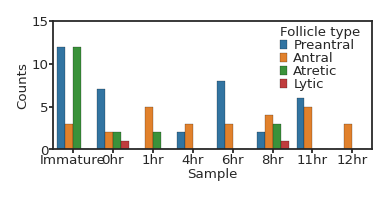

In [518]:
sc.settings.set_figure_params(dpi=80, fontsize=6, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (2.4,1.2))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.barplot(freq_table, y = "count", x = "Sample", hue="Follicle_type",  dodge=True, palette="tab10", ax=ax, 
           linewidth=0.1, edgecolor="black")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, title = "Follicle type",
           labelspacing = 0.0, frameon = False,  title_fontsize = 6, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (0.97, 0.98))
plt.rcParams['legend.title_fontsize'] = 9
ax.set_ylim(0,15)
ax.set_ylabel("Counts", labelpad = 1.0)
ax.set_xlabel("Sample", labelpad = 0.5)
plt.tight_layout()
plt.savefig("./figures/oocyte_follicle_type_stats.pdf")

In [435]:
# Oocyte only
oocytes = adata_ovary_combined.raw.to_adata()[adata_ovary_combined.obs["Level0_max_pred_celltype"] == "Level0_Oocyte",]
oocytes = oocytes[oocytes.obs["Level0_max_pred"] > 0.5]
oocytes.shape

(2279, 31053)

In [436]:
oocyte_dict = dict()
for sample in samples_dict.keys():
        oocyte_dict[sample] = oocytes[oocytes.obs["Sample"] == sample]
        oocyte_dict

In [437]:
import scipy.spatial as scisp
for sample in samples_dict.keys():
    # Calculate euclidean distances
    oocyte_dict[sample].obsm["spatial_distances"] = scisp.distance.squareform(scisp.distance.pdist(oocyte_dict[sample].obsm['spatial']))
    oocyte_dict[sample].obs["spatial_neighbors_100_true"] = np.sum(oocyte_dict[sample].obsm["spatial_distances"] < 100, axis=0)

In [438]:
for sample in samples_dict.keys():
#     sc.pl.spatial(oocyte_dict[sample][oocyte_dict[sample].obs["spatial_neighbors_100_true"] >= 5,], color=["leiden_1.5", "spatial_neighbors_100_true"], spot_size=30, wspace=0.25, title=sample)
    oocyte_dict[sample] = oocyte_dict[sample][oocyte_dict[sample].obs["spatial_neighbors_100_true"] >= 5,]

In [439]:
oocytes = oocyte_dict[list(samples_dict.keys())[0]].concatenate([oocyte_dict[x] for x in list(samples_dict.keys())[1:]], index_unique = None)
del oocyte_dict
oocytes.obs = oocytes.obs.drop(columns=["batch"])

/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [440]:
# count the number of occurrences of each category
oocytes.obs["oocyte_clusters"] = oocytes.obs["FollicleNumber"]
oocytes.obs["oocyte_clusters"] = oocytes.obs["oocyte_clusters"].astype(str)
oocytes.obs.loc[oocytes.obs["Level0_max_pred_celltype"] != "Level0_Oocyte", "oocyte_clusters"] = np.NAN

# Chnage oocyte labels to categories again
oocytes.obs["oocyte_clusters"] = oocytes.obs["oocyte_clusters"].astype("category")

In [441]:
oocytes.obs.Follicle_type.value_counts()

Antral       792
Preantral    745
Atretic      223
Lytic         25
Name: Follicle_type, dtype: int64

In [442]:
oocytes.obs["Follicle_type"] = adata_ovary_combined[oocytes.obs_names].obs["Follicle_type"]

/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python

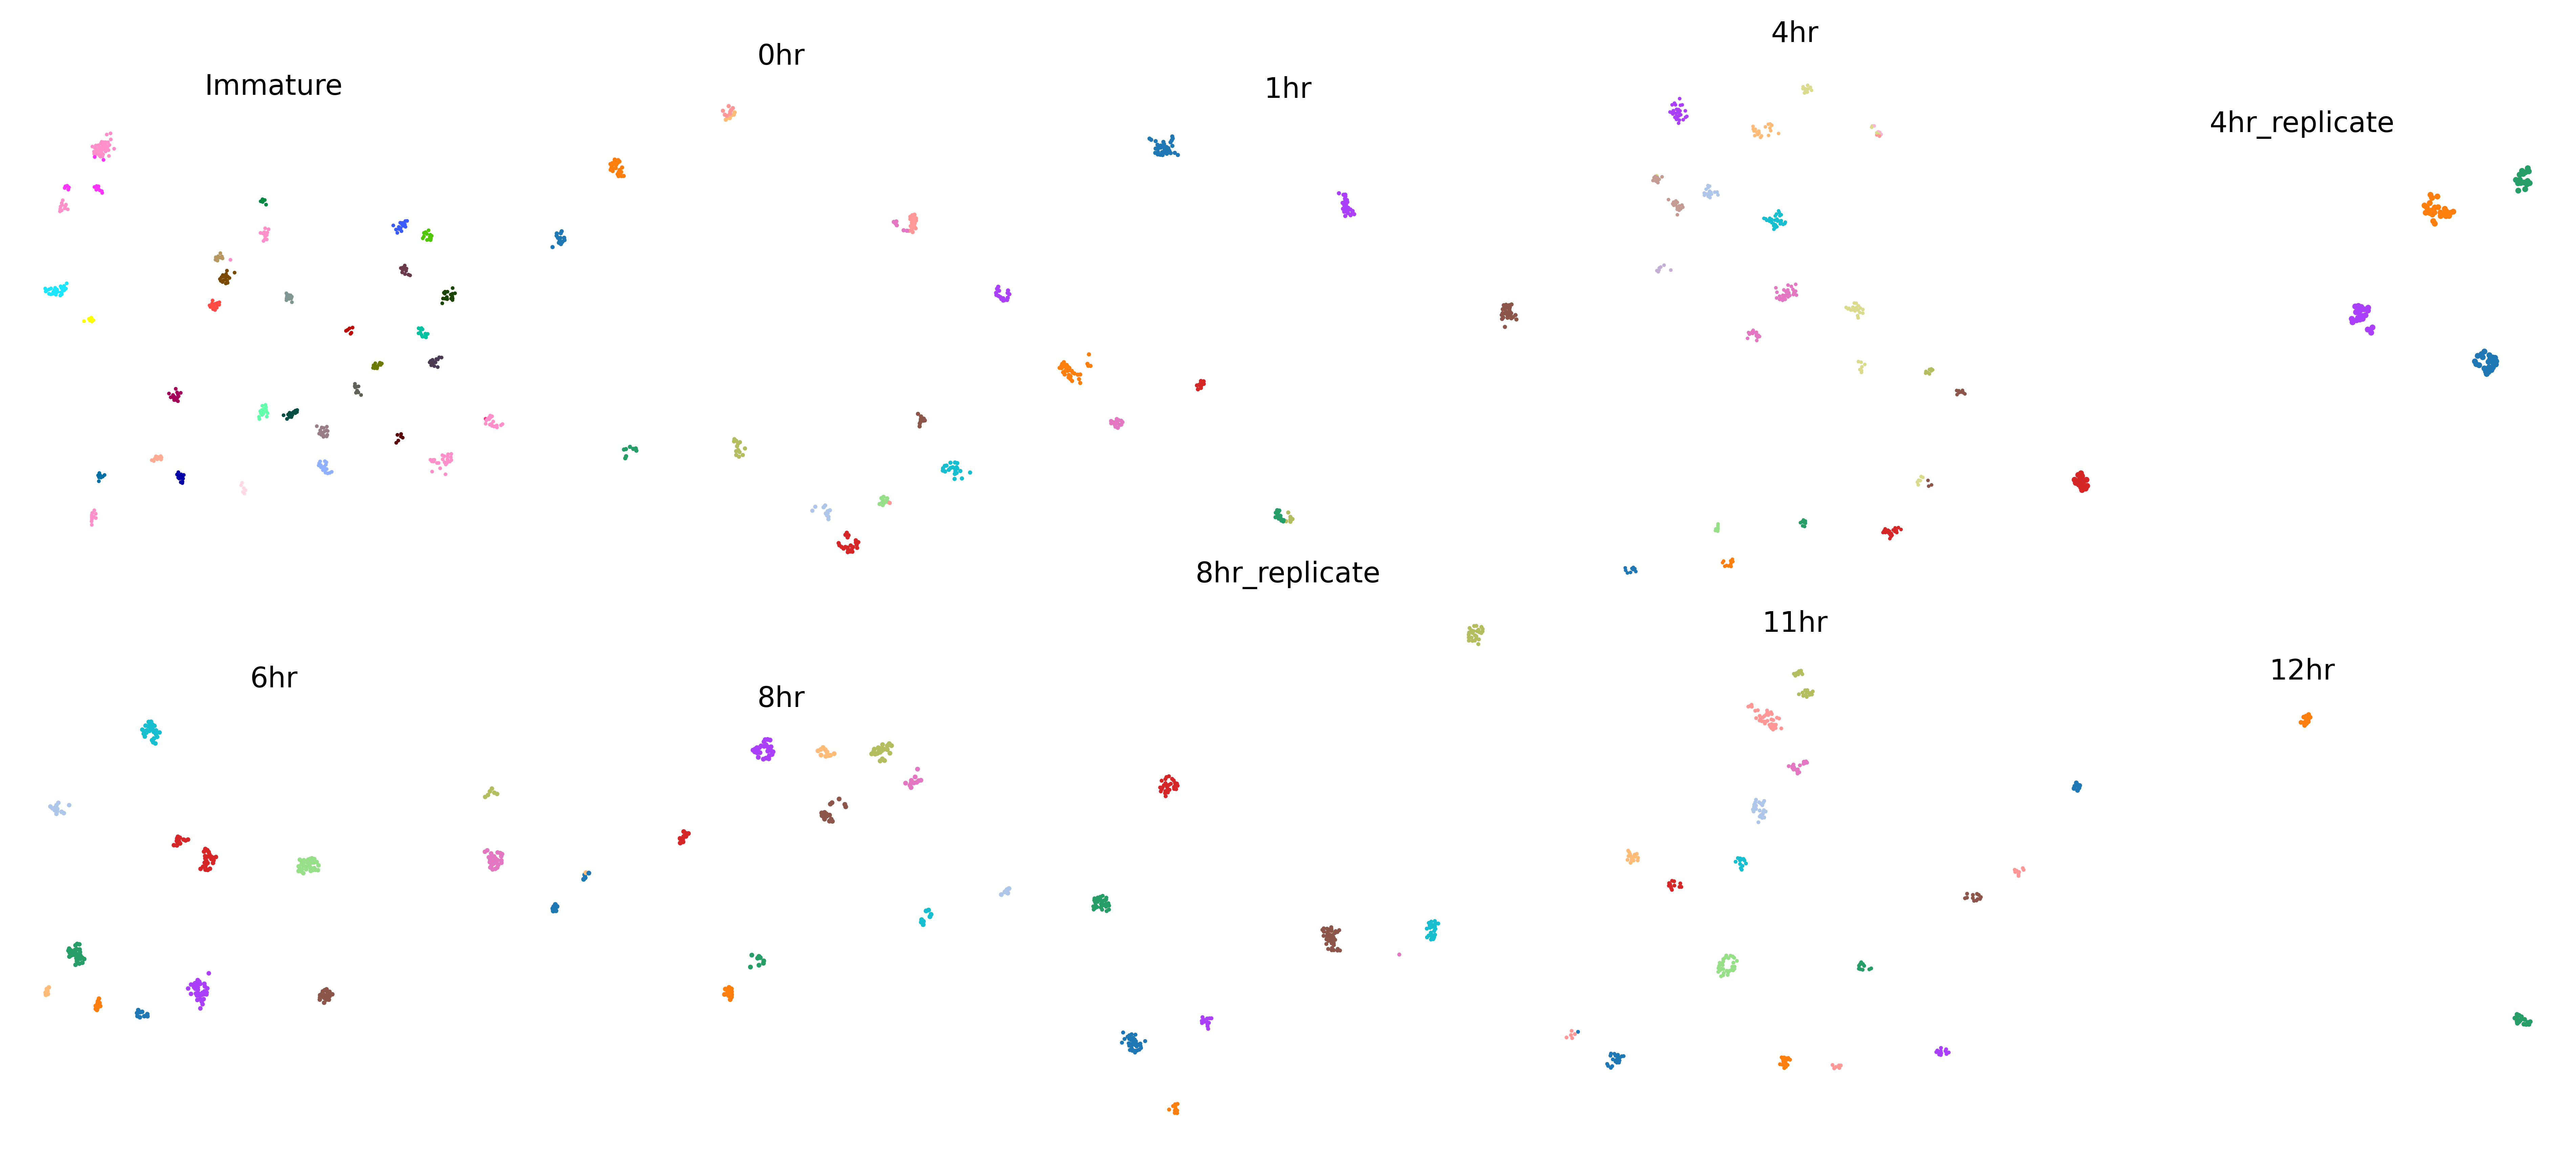

In [443]:
sc.settings.set_figure_params(dpi=300, dpi_save= 300, fontsize=10, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = True, transparent=True, format="pdf")
grouping_var = "oocyte_clusters"
fig, axs = plt.subplots(2,5, figsize = (16,7))
for i, sample in enumerate(samples_dict.keys()):
    subset = oocytes[oocytes.obs["Sample"] == sample]
#     subset.obs[grouping_var] = subset.obs[grouping_var].cat.set_categories(adata_ovary_combined.obs[grouping_var].cat.categories)
#     print(subset.obs[grouping_var].cat.categories)
    if i == 3:
        sc.pl.spatial(subset, color = [grouping_var], wspace= 0.0, hspace = 0.0, spot_size = 30, frameon=False, title=sample, show=False, ax=axs[int(i/5), int(i%5)], na_color="lightgray", na_in_legend=False)
        handles, labels = axs[int(i/5), int(i%5)].get_legend_handles_labels()
        axs[int(i/5), int(i%5)].get_legend().remove()
    else: 
        sc.pl.spatial(subset, color = [grouping_var], wspace= 0.0, hspace = 0.0, spot_size = 30, frameon=False, title=sample, show=False, legend_loc="none", ax=axs[int(i/5), int(i%5)], na_color="lightgray", na_in_legend=False)  
# fig.legend(handles, labels, ncol = 3, loc='lower center', bbox_to_anchor = (0.57,0.05), title = "Predicted oocyte beads")
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig("./figures/spatial_maps_granulosa.pdf")

In [445]:
oocytes.write_h5ad("./../pyobjs/oocytes_combined.h5ad")

In [446]:
oocytes = sc.read_h5ad("./../pyobjs/oocytes_combined.h5ad")
oocytes.shape

(2122, 31053)

In [447]:
# Load your anndata object
adata = sc.read_h5ad("./../pyobjs/adata_ovary_combined_raw_counts_filtered.h5ad")
adata = adata[oocytes.obs_names]
adata.obs = oocytes.obs
print(adata.shape)

# Set the categorical metadata variable to use for pseudobulk matrix construction
metadata_variable = 'FollicleNumber'

# Get the unique values of the metadata variable
metadata_values = adata.obs[metadata_variable].astype(str).unique()

# Initialize an empty dictionary to store the pseudobulk matrices
pseudobulk_dfs = list()

# Loop over each metadata value and create a pseudobulk matrix for each subset of cells
for metadata_value in metadata_values:
    if metadata_value == "nan": 
        continue
    # Subset the anndata object based on the metadata variable
    subset_indices = np.where(adata.obs[metadata_variable] == metadata_value)[0]
    subset_adata = adata[subset_indices, :]

    # Calculate mean expression for each gene across all cells in the subset
    mean_expression = np.sum(subset_adata.X, axis=0)

    # Create a dataframe with gene names as row names and mean expression values as a single column
    pseudobulk_dfs.append(pd.DataFrame(data=mean_expression.T, index=adata.var_names, columns=[metadata_value]))
    
# Create a merged df with pseudobulk expression
pseudobulk_df = pseudobulk_dfs[0].join(pseudobulk_dfs[1:])
print(pseudobulk_df.shape)
del pseudobulk_dfs

(2122, 31053)
(31053, 113)


In [448]:
print(np.sum(pseudobulk_df).sum())

2974472.0


In [449]:
# print(pseudobulk_df.shape)
pseudobulk_df.to_csv("./../pyobjs/oocyte_pseudobulk_thresh0.5.csv")

In [450]:
oocytes = sc.read_h5ad("./../pyobjs/oocytes_combined.h5ad")
oocytes.shape

(2122, 31053)

In [451]:
pseudobulk_df = pd.read_csv("./../pyobjs/oocyte_pseudobulk_thresh0.5.csv", index_col=0)
pseudobulk_df.shape

(31053, 113)

In [332]:
# print(np.sum(pd.read_csv("./../pyobjs/oocyte_pseudobulk_thresh0.9.csv", index_col=0)).sum())
# print(np.sum(pd.read_csv("./../pyobjs/oocyte_pseudobulk_thresh0.5.csv", index_col=0)).sum())
# print(np.sum(pd.read_csv("./../pyobjs/oocyte_pseudobulk.csv", index_col=0)).sum())

In [519]:
mode_df = pd.read_csv("./../pyobjs/follicle_mode.csv")
print(mode_df.shape)
mode_df.head()

(425, 4)


FollicleNumber Follicle_type    Sample  size
0      Follicle0       Atretic  Immature    49
1      Follicle1        Antral  Immature   226
2      Follicle2     Preantral  Immature    16
3      Follicle3       Atretic  Immature    67
4      Follicle4     Preantral  Immature    16

In [453]:
mode_df["Follicle_type"].value_counts()

Antral       157
Preantral    136
Atretic       97
Lytic         35
Name: Follicle_type, dtype: int64

In [454]:
mode_df = oocytes.obs.groupby('FollicleNumber')[['Follicle_type', "Sample"]].apply(lambda x: x.mode()).reset_index()
mode_df["size"] = oocytes.obs.groupby('FollicleNumber').size().values
mode_df["total_counts"] = oocytes.obs.groupby('FollicleNumber')['total_counts'].apply(lambda x: x.sum()).reset_index()["total_counts"]
mode_df = mode_df.drop('level_1', axis=1)
mode_df = mode_df.drop_duplicates(subset='FollicleNumber', keep='first')
mode_df = mode_df.set_index(mode_df["FollicleNumber"])
print(mode_df.shape)

(113, 5)


In [455]:
mode_df = mode_df[~pd.isna(mode_df.Follicle_type)]

In [456]:
import anndata as ad
pseudobulk_df_filtered = pseudobulk_df[mode_df[mode_df["size"] >= 0].index]
oocytes_bulk = ad.AnnData(X=pseudobulk_df_filtered.T)
oocytes_bulk.obs = mode_df.loc[oocytes_bulk.obs_names,]

/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:782: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    ['Follicle1', 'Follicle2', 'Follicle4', 'Follicle5', 'Follicle12']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)


In [457]:
oocytes_bulk.obs["Follicle_type"].value_counts()

Preantral    49
Antral       39
Atretic      20
Lytic         3
Name: Follicle_type, dtype: int64

In [458]:
oocytes_bulk.obs["Sample"] = oocytes_bulk.obs["Sample"].cat.reorder_categories(list(samples_dict.keys()))

In [459]:
print(oocytes_bulk.shape)
oocytes_bulk = oocytes_bulk[~oocytes_bulk.obs["Sample"].isin(["4hr", "8hr_replicate"])]
oocytes_bulk.obs["Sample"] = oocytes_bulk.obs["Sample"]
temp = {"Immature": "Immature", "0hr": "0hr", "1hr": "1hr", "4hr": "4hr", "4hr_replicate" : "4hr", "6hr": "6hr",
        "8hr": "8hr", "8hr_replicate" : "8hr", "11hr": "11hr", "12hr": "12hr"}
oocytes_bulk.obs["Sample"] = oocytes_bulk.obs["Sample"].map(temp).astype("category")
# oocytes_bulk.obs["Sample"] = oocytes_bulk.obs["Sample"].cat.reorder_categories([ 'Immature', '0hr', '1hr', '4hr', '6hr', '8hr','11hr', '12hr'])
print(oocytes_bulk.shape)

(111, 31053)
(86, 31053)


/tmp/ipykernel_607628/2253184080.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  oocytes_bulk.obs["Sample"] = oocytes_bulk.obs["Sample"]
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [460]:
oocytes_bulk.write_h5ad("./../pyobjs/oocytes_bulk_rawcounts.h5ad")

In [461]:
correlation_df = pd.read_csv("./../pyobjs/correlations_magic_full_oocyte_pred.csv", index_col=0)

In [462]:
oocyte_genes = correlation_df[correlation_df["correlation"]>0.5]["gene"].values
print(len(oocyte_genes))

5373


In [463]:
correlation_df.loc["Tet3",]

gene               Tet3
correlation    0.871773
means          0.225243
dispersions    2.700251
Name: Tet3, dtype: object

In [464]:
# oocytes_bulk = sc.read_h5ad("./../pyobjs/oocytes_bulk_rawcounts.h5ad")
# oocytes_bulk

In [465]:
oocytes_bulk = oocytes_bulk[:,oocyte_genes]
sc.pp.filter_genes(oocytes_bulk, min_cells=1)
oocytes_bulk.obs["total_counts"] = oocytes_bulk.to_df().sum(axis=1)
oocytes_bulk.obs["ngenes_counts"] = np.sum(oocytes_bulk.to_df() != 0.0, axis=1)
oocytes_bulk

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


AnnData object with n_obs × n_vars = 86 × 4841
    obs: 'FollicleNumber', 'Follicle_type', 'Sample', 'size', 'total_counts', 'ngenes_counts'
    var: 'n_cells'

In [466]:
oocytes_bulk = oocytes_bulk[oocytes_bulk.obs["size"] >= 5,]
# oocytes_bulk = oocytes_bulk[oocytes_bulk.obs["total_counts"] >= 1000,]
oocytes_bulk.shape

(85, 4841)

In [467]:
oocytes_bulk = oocytes_bulk[~oocytes_bulk.obs["Follicle_type"].isin(["Lytic"])]

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


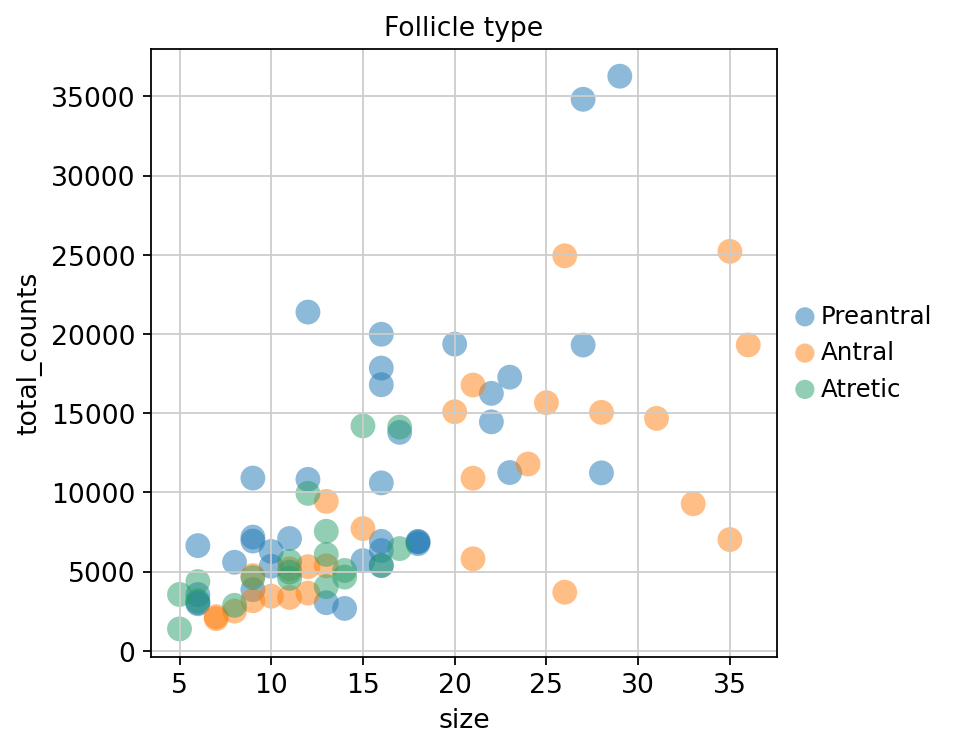

In [468]:
sc.settings.set_figure_params(dpi=80, fontsize=12, facecolor='white', frameon=True, figsize=(5, 5))
sc.pl.scatter(oocytes_bulk, "size", "total_counts", color="Follicle_type", size=500, alpha=0.5)

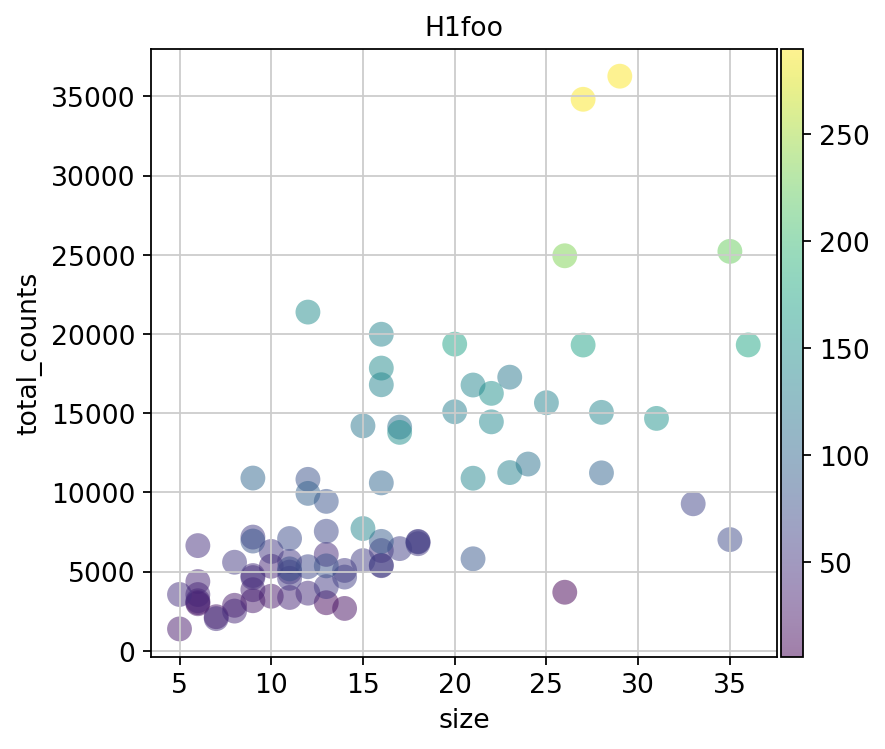

In [469]:
sc.settings.set_figure_params(dpi=80, fontsize=12, facecolor='white', frameon=True, figsize=(5, 5))
sc.pl.scatter(oocytes_bulk, "size", "total_counts", color="H1foo", size=500, alpha=0.5)

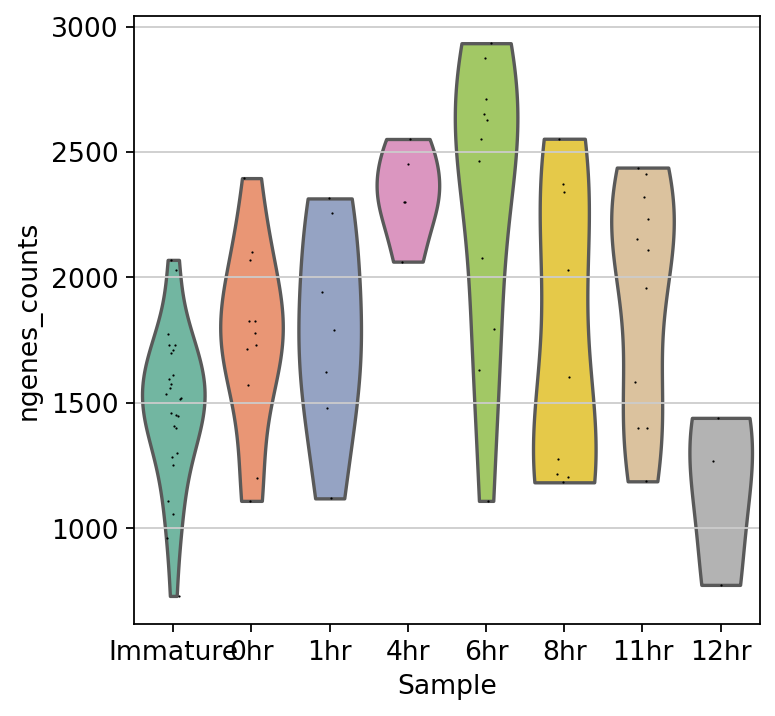

In [514]:
sc.settings.set_figure_params(dpi=80, fontsize=12, facecolor='white', frameon=True, figsize=(5, 5))
sc.pl.violin(oocytes_bulk, keys=["ngenes_counts"], groupby="Sample")

In [595]:
mean(oocytes_bulk.obs["size"])

15.710843373493976

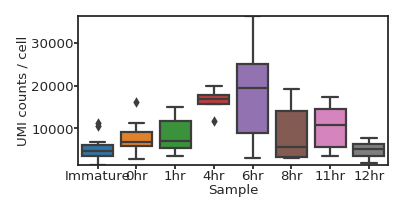

In [599]:
sc.settings.set_figure_params(dpi=80, fontsize=6, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (2.5,1.3))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.boxplot(oocytes_bulk.obs, y = "total_counts", x = "Sample", dodge=True, palette="tab10", linewidth=1.0, fliersize=2.0, ax=ax)
plt.rcParams['legend.title_fontsize'] = 9
# ax.set_ylim(0,5000)
# ax.set_yscale("log")
ax.set_ylabel("UMI counts / cell", labelpad = 1.0)
ax.set_xlabel("Sample", labelpad = 0.5)
plt.tight_layout()
plt.savefig("./figures/oocytes_total_counts.pdf")

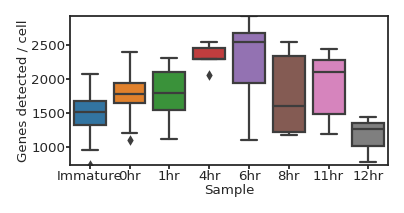

In [598]:
sc.settings.set_figure_params(dpi=80, fontsize=6, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (2.5,1.3))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.boxplot(oocytes_bulk.obs, y = "ngenes_counts", x = "Sample", dodge=True, palette="tab10", ax=ax, linewidth=1.0, fliersize=2.0)
plt.rcParams['legend.title_fontsize'] = 9
# ax.set_ylim(0,5000)
# ax.set_yscale("log")
ax.set_ylabel("Genes detected / cell", labelpad = 1.0)
ax.set_xlabel("Sample", labelpad = 0.5)
plt.tight_layout()
plt.savefig("./figures/oocytes_ngenes_counts.pdf")

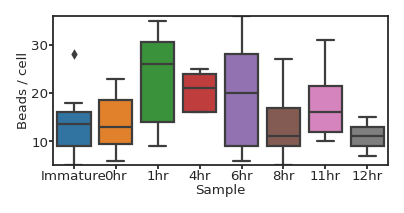

In [600]:
sc.settings.set_figure_params(dpi=80, fontsize=6, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (2.5,1.3))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.boxplot(oocytes_bulk.obs, y = "size", x = "Sample", dodge=True, palette="tab10", linewidth=1.0, fliersize=2.0, ax=ax)
plt.rcParams['legend.title_fontsize'] = 9
# ax.set_ylim(0,5000)
# ax.set_yscale("log")
ax.set_ylabel("Beads / cell", labelpad = 1.0)
ax.set_xlabel("Sample", labelpad = 0.5)
plt.tight_layout()
plt.savefig("./figures/oocytes_size.pdf")

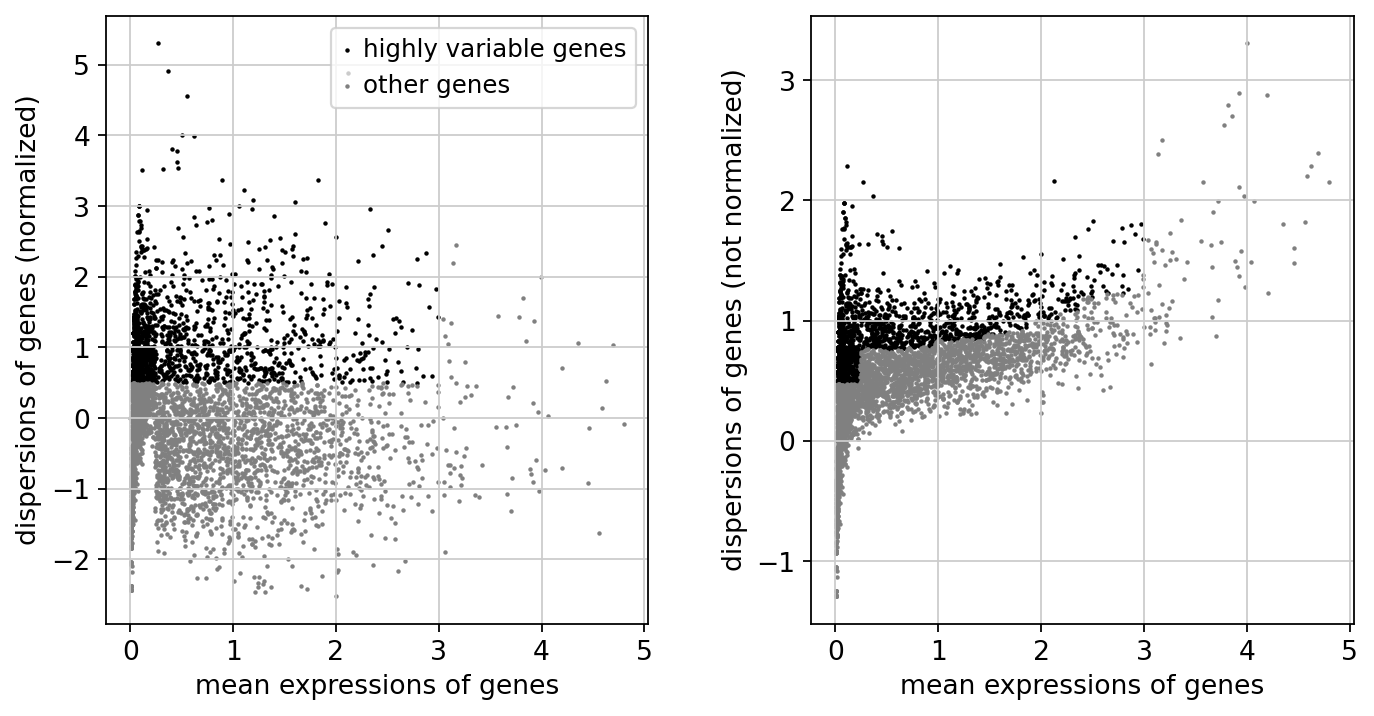

1421


In [470]:
sc.pp.normalize_total(oocytes_bulk, target_sum = 1e4, inplace=True)
sc.pp.log1p(oocytes_bulk)
sc.tl.score_genes_cell_cycle(oocytes_bulk, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.highly_variable_genes(oocytes_bulk)
sc.pl.highly_variable_genes(oocytes_bulk)
print(np.sum(oocytes_bulk.var.highly_variable))

(83, 1421)


/home/mm2937/.local/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


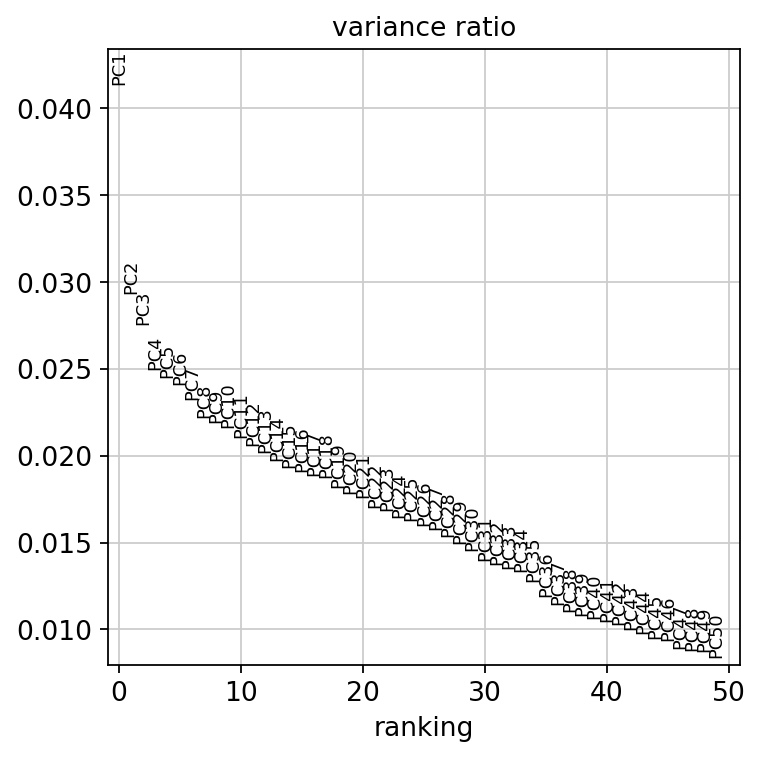

In [471]:
oocytes_bulk.raw = oocytes_bulk
oocytes_bulk = oocytes_bulk[:, oocytes_bulk.var.highly_variable]
print(oocytes_bulk.shape)
# sc.pp.regress_out(oocytes_bulk)
sc.pp.scale(oocytes_bulk, max_value=10)
sc.pp.pca(oocytes_bulk, random_state= 0)
sc.pl.pca_variance_ratio(oocytes_bulk, n_pcs = 50)

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


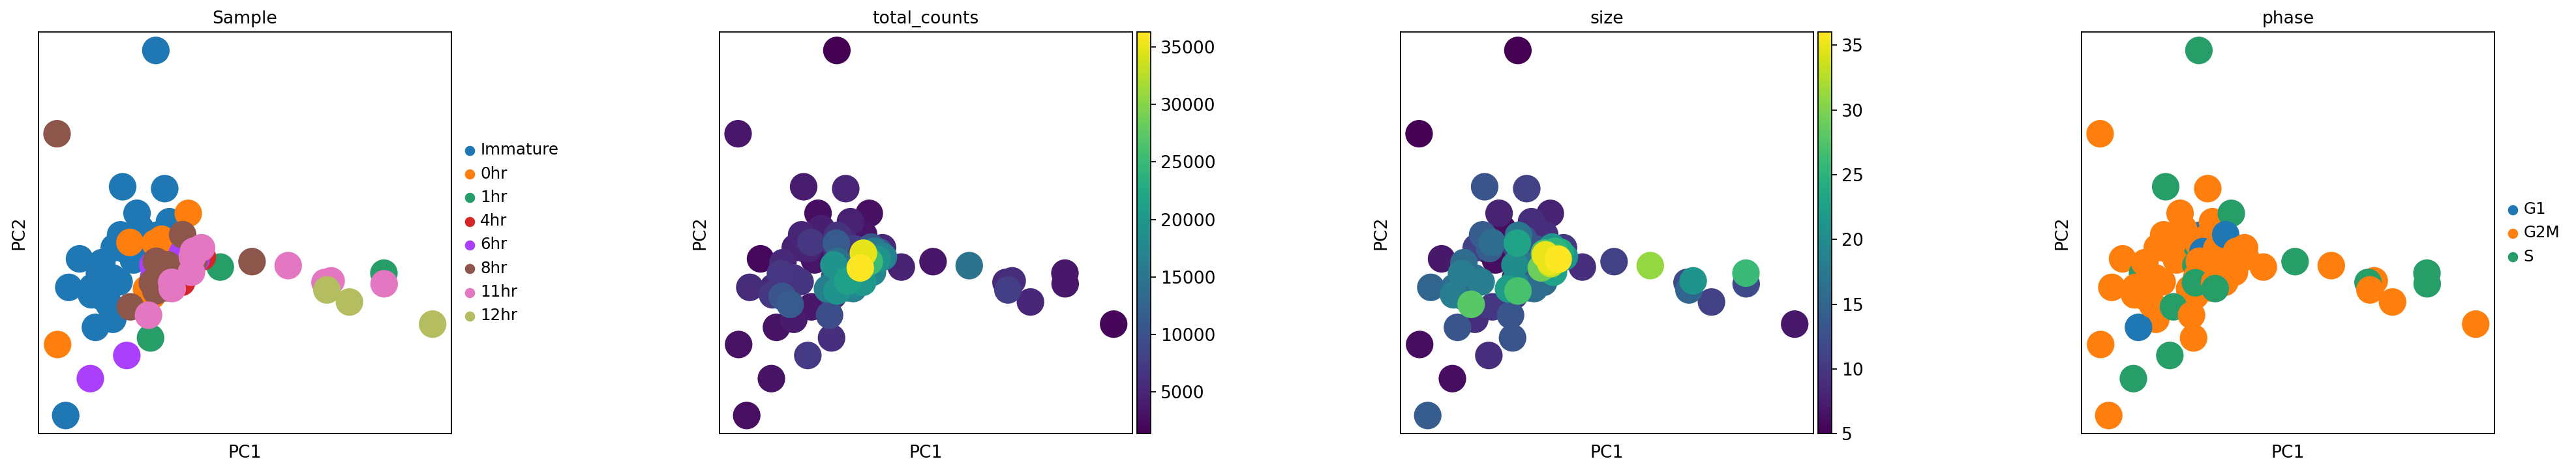

In [472]:
sc.pl.pca(oocytes_bulk, color=["Sample", "total_counts", "size", "phase"], wspace=0.5)

In [473]:
correlation_df.loc["H1foo",]

gene              H1foo
correlation     0.89787
means          0.672873
dispersions    3.516821
Name: H1foo, dtype: object

In [474]:
sc.pp.neighbors(oocytes_bulk, n_pcs=50)
sc.tl.umap(oocytes_bulk)

In [475]:
sc.tl.leiden(oocytes_bulk, key_added="oocyte_leiden_0.5", resolution = 0.5)
sc.tl.leiden(oocytes_bulk, key_added="oocyte_leiden_0.7", resolution = 0.7)
sc.tl.leiden(oocytes_bulk, key_added="oocyte_leiden_0.8", resolution = 0.8)

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


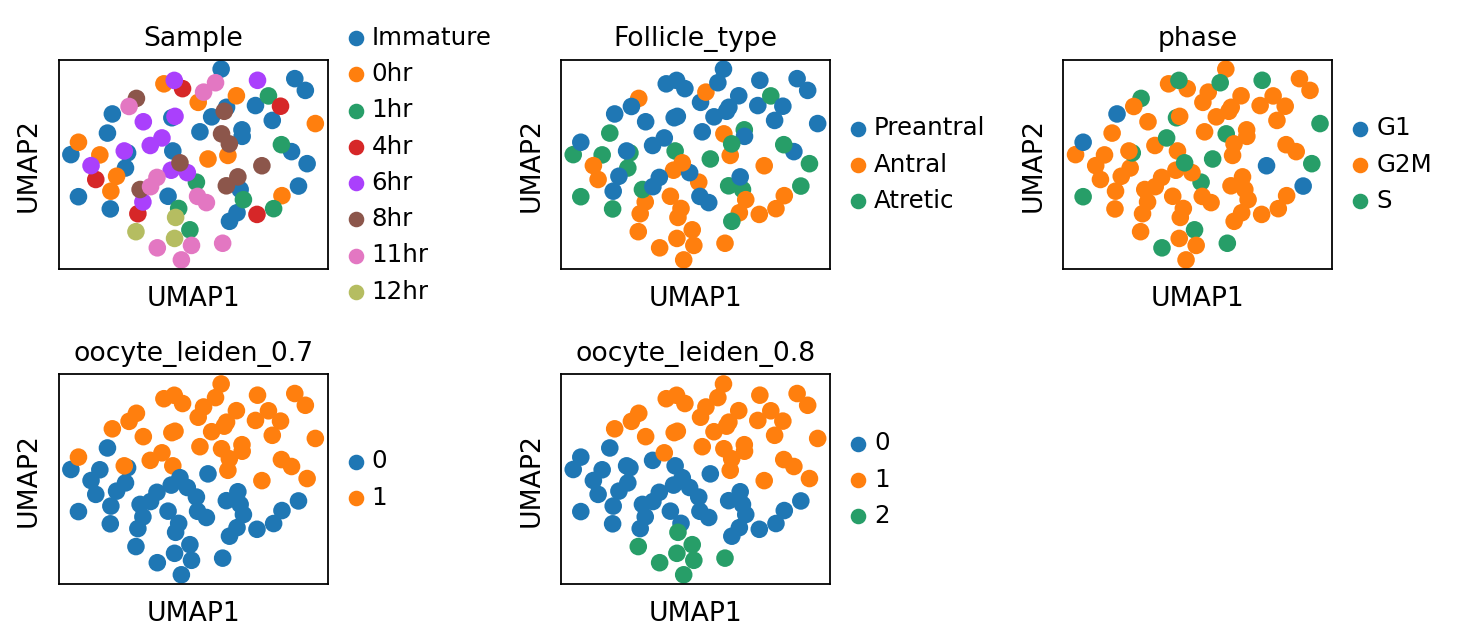

In [476]:
sc.settings.set_figure_params(dpi=80, fontsize=12, facecolor='white', frameon=True, figsize=(2, 2))
sc.pl.umap(oocytes_bulk, color=["Sample", "Follicle_type", "phase", "oocyte_leiden_0.7", "oocyte_leiden_0.8"], wspace=0.7, hspace=0.5, size=250, ncols=3)

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


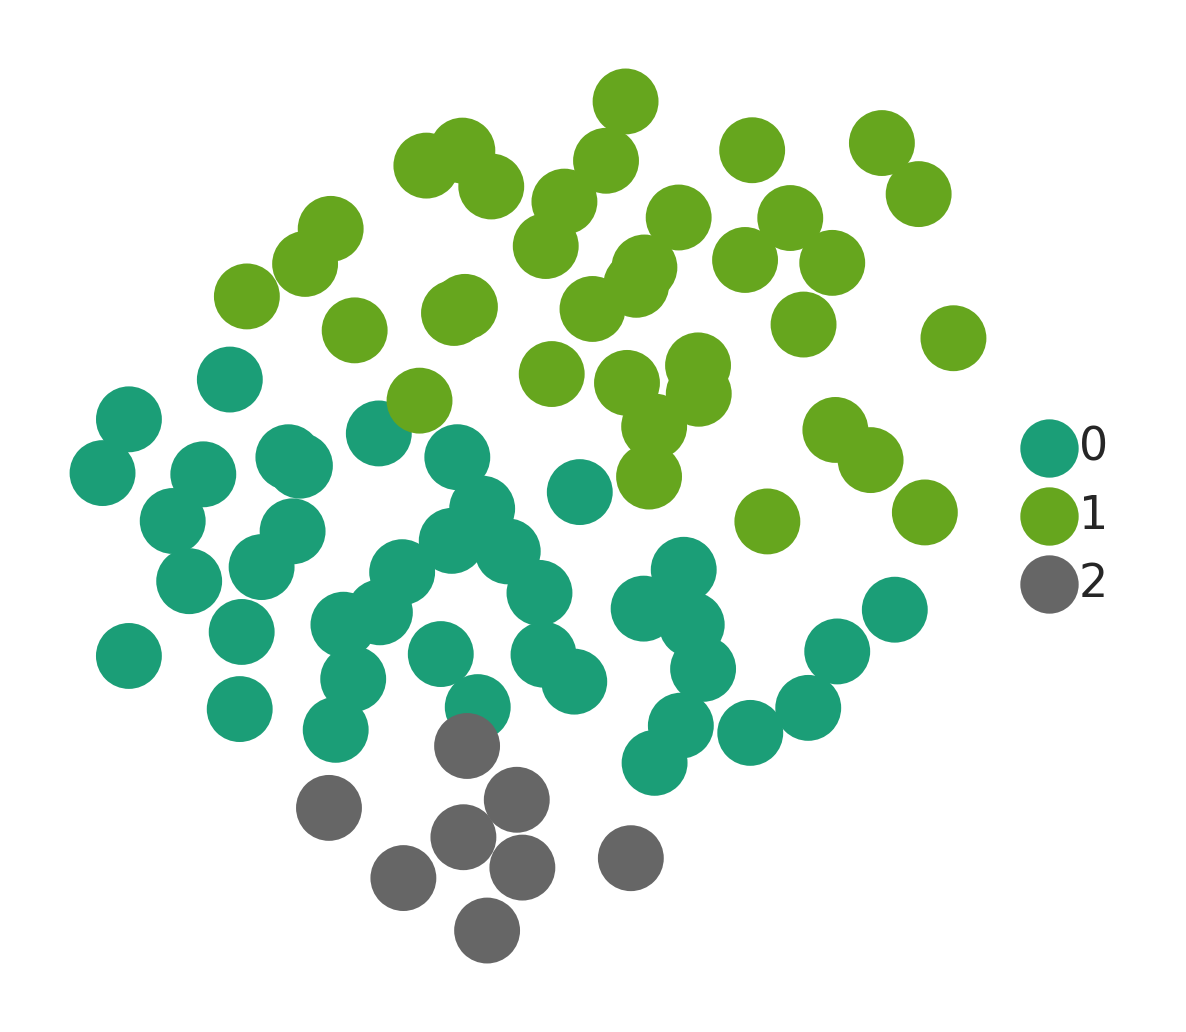

In [553]:
sc.settings.set_figure_params(dpi=300, dpi_save=300, facecolor='white', fontsize=6, frameon=False, figsize=(2, 2))
sc.pl.umap(oocytes_bulk, size = 250.0, color = ["oocyte_leiden_0.8"], ncols=3, palette="Dark2", wspace=0.5, hspace = 0.5, title = "", save = "oocytes_clusters.pdf")

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


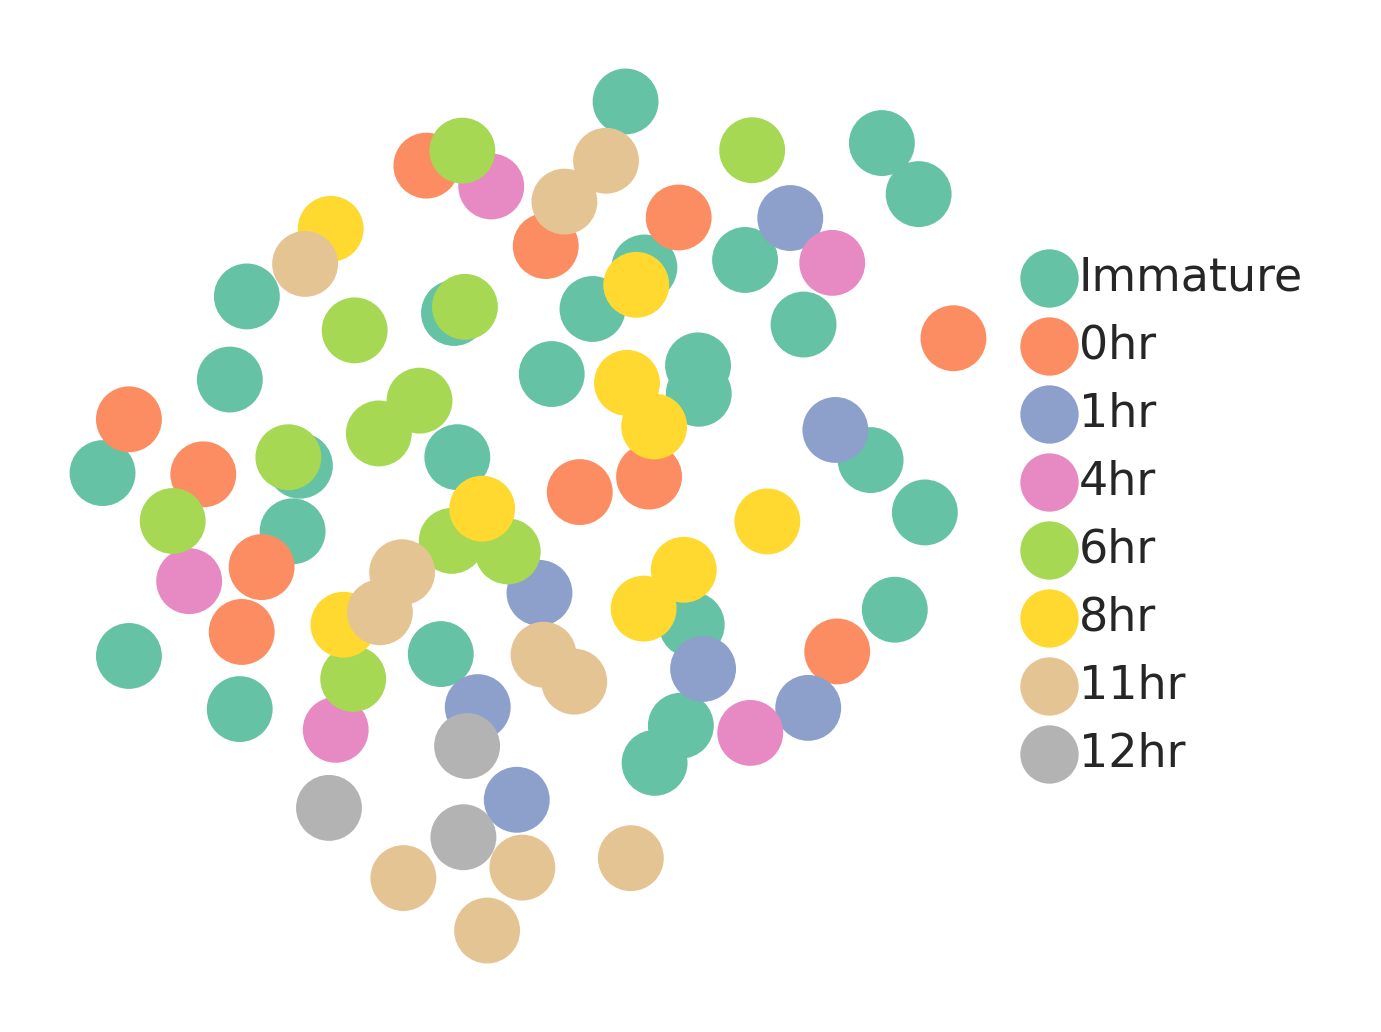

In [546]:
sc.settings.set_figure_params(dpi=300, dpi_save=300, facecolor='white', fontsize=6, frameon=False, figsize=(2, 2))
sc.pl.umap(oocytes_bulk, size = 250.0, color = ["Sample"], ncols=3, palette="Set2", wspace=0.5, hspace = 0.5, title = "", save = "oocytes_samples.pdf")

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


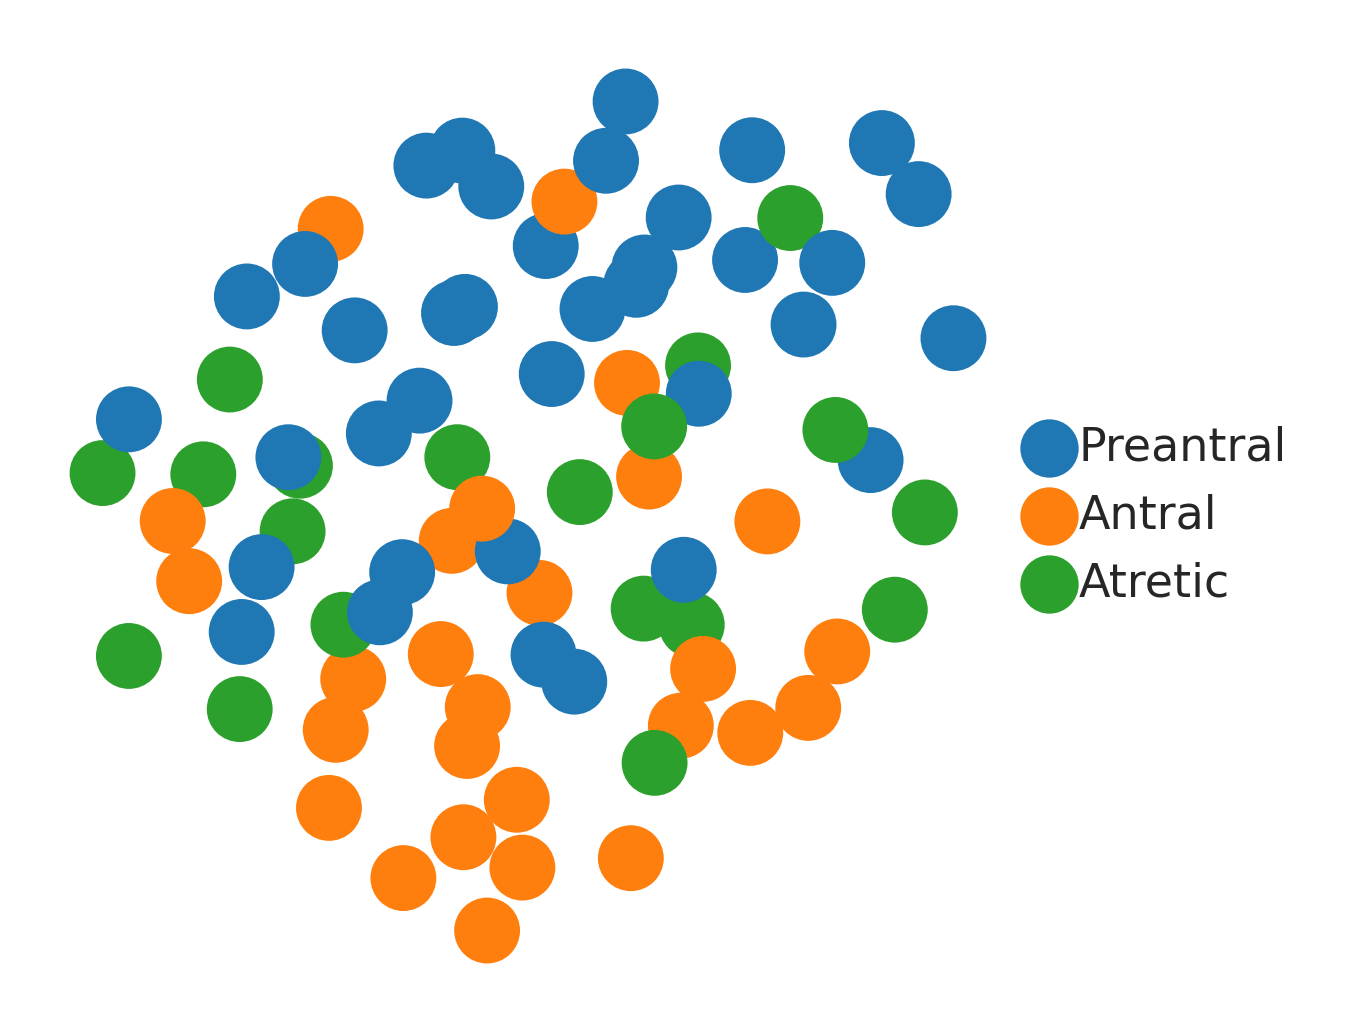

In [552]:
from pylab import *
cmap = cm.get_cmap('tab10')
palette_custom = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
cmap

sc.settings.set_figure_params(dpi=300, dpi_save=300, facecolor='white', fontsize=6, frameon=False, figsize=(2, 2))
sc.pl.umap(oocytes_bulk, size = 250.0, color = ["Follicle_type"], ncols=3, palette=palette_custom[0:3], wspace=0.5, hspace = 0.5, title = "", save = "oocytes_follicle_type.pdf")

In [480]:
sc.tl.rank_genes_groups(oocytes_bulk, groupby="Follicle_type", use_raw=True, key_added='rank_genes_groups_oocytes_Follicle_type', pts=True, method="wilcoxon")
# sc.tl.filter_rank_genes_groups(oocytes_bulk, key="rank_genes_groups_oocytes_Follicle_type", key_added="rank_genes_groups_oocytes_Follicle_type_filtered")

In [579]:
sc.tl.rank_genes_groups(oocytes_bulk, groupby="oocyte_leiden_0.8", use_raw=True, key_added='rank_genes_groups_oocytes_leiden_0.8', pts=True)
# sc.tl.rank_genes_groups(oocytes_bulk, groupby="oocyte_leiden_1.0", use_raw=True, key_added='rank_genes_groups_oocytes_leiden_1.0')

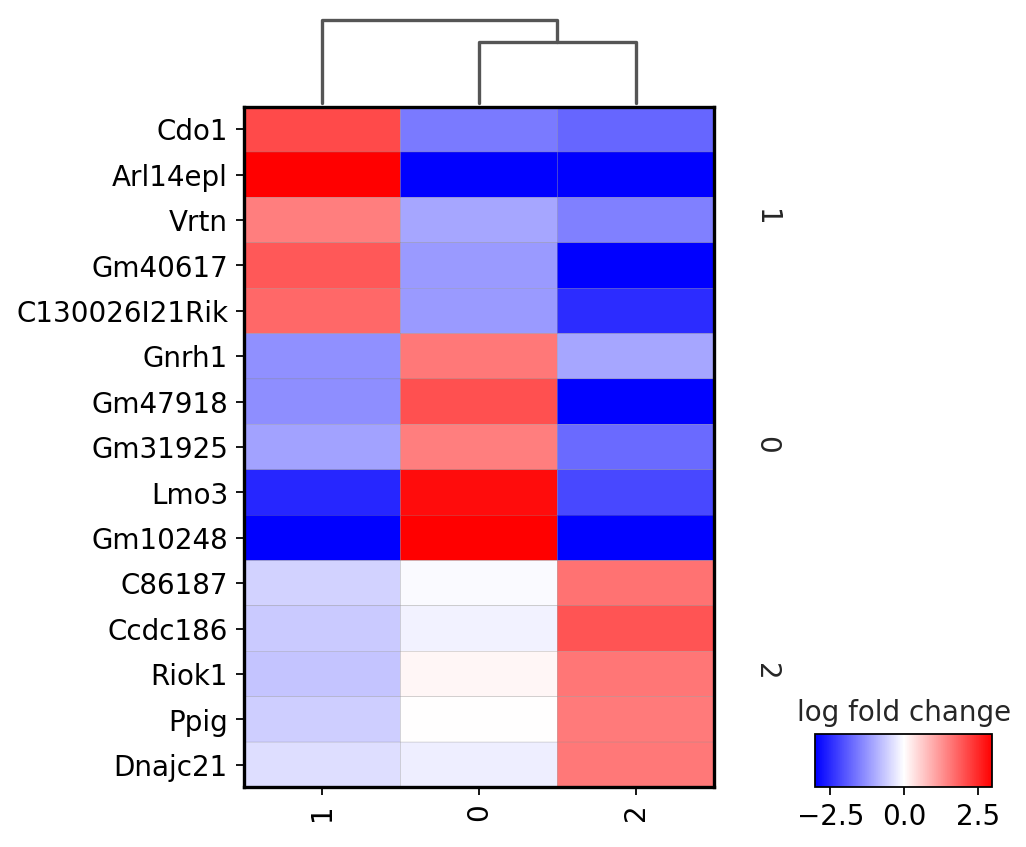

In [580]:
sc.settings.set_figure_params(dpi=80, fontsize=15, facecolor='white', frameon=True, figsize=(10, 15))
sc.pl.rank_genes_groups_matrixplot(oocytes_bulk, n_genes=5, swap_axes=True, key="rank_genes_groups_oocytes_leiden_0.8", min_logfoldchange=1.5 ,values_to_plot='logfoldchanges', vmax=3, vmin=-3, cmap='bwr', save="rank_genes_groups_oocytes_leiden_0.7", figsize = (6,6))
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


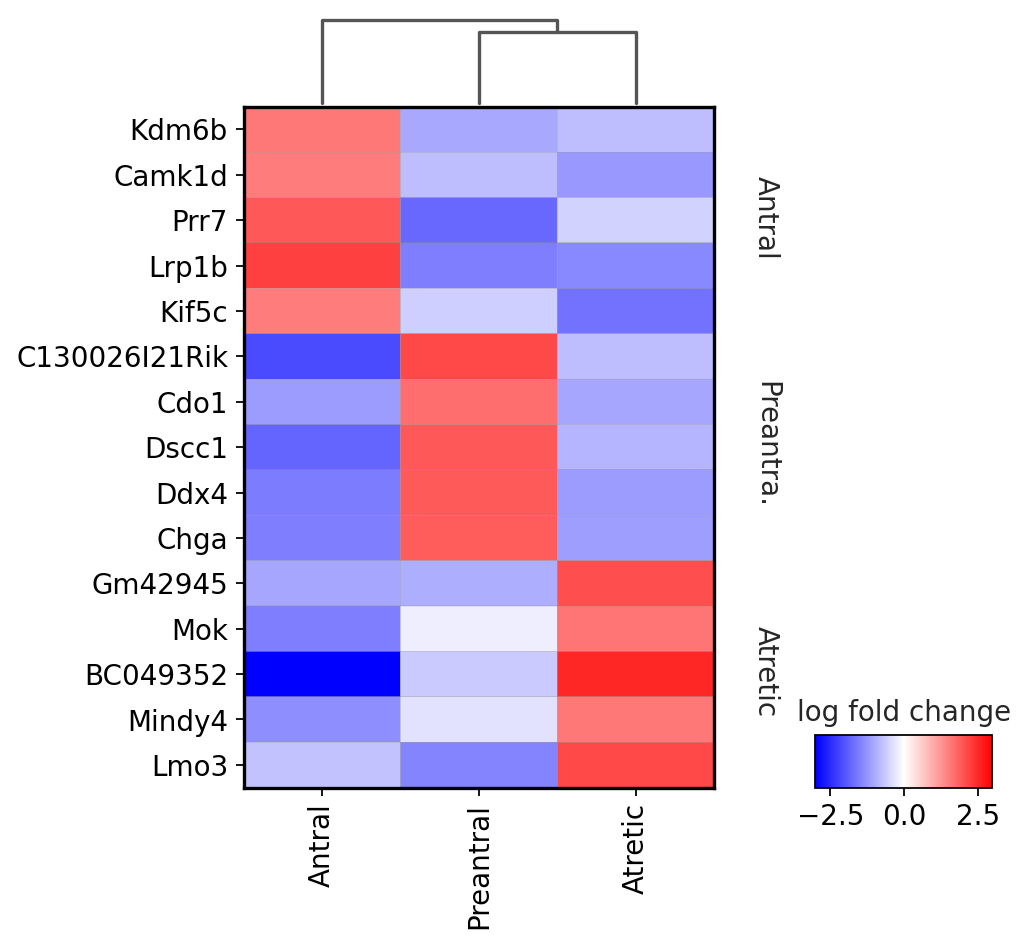

In [540]:
sc.settings.set_figure_params(dpi=80, fontsize=15, facecolor='white', frameon=True, figsize=(10, 15))
sc.pl.rank_genes_groups_matrixplot(oocytes_bulk, n_genes=5, swap_axes=True, key="rank_genes_groups_oocytes_Follicle_type", min_logfoldchange=1.5, values_to_plot='logfoldchanges', vmax=3, vmin=-3, cmap='bwr', save="oocytes_bulk_combined_follicletype_markers", figsize = (6,6))
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

In [581]:
result = oocytes_bulk.uns['rank_genes_groups_oocytes_leiden_0.8']
groups = result['names'].dtype.names
dge_results = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names', "logfoldchanges", "pvals_adj"]}).head(30)
dge_results

0_names  0_logfoldchanges  0_pvals_adj        1_names  \
0          Umodl1          1.069950     0.004737           Cdo1   
1           Gnrh1          1.581775     0.004976          Nlrp5   
2         Gm47918          2.046116     0.012141  A530040E14Rik   
3            Nudc          0.707676     0.033843         Dppa5a   
4           Oser1          0.963458     0.050032          Nobox   
5         Gm31925          1.520417     0.037990       Arl14epl   
6         Gm31834          1.395335     0.050032          Khdc3   
7           Spry4          0.967369     0.051459           Astl   
8           Zar1l          0.938434     0.079111         Ptpn18   
9           Elac2          1.366324     0.079111           Vrtn   
10           Kat8          0.981688     0.081378        Gm40617   
11         Sap30l          0.760018     0.090280  C130026I21Rik   
12       AA545190          1.101917     0.090280          Esrrb   
13        Gm14635          1.472511     0.093785            Zp2   
14           Lmo3          2.852210     0.095228            Zp3   
15        Gm10248         28.119316     0.096152          Padi6   
16        Slco1a5          2.370041     0.095228         Trim27   
17       Rnaset2a          0.997507     0.095228         Nlrp14   
18           Oog1          0.817891     0.095228        Gtf2a1l   
19          Myo16          1.692995     0.095228           Noto   
20          Oosp2          0.752139     0.095228           Ddx4   
21        Gm42945          1.873953     0.095228           Npm2   
22        Dnajc11          0.870217     0.096152        Tex19.1   
23          Ms4a1          1.323444     0.096152           Pigp   
24           Ska1          0.857004     0.096152         Khdc1b   
25  2210406O10Rik          1.163952     0.096152          Figla   
26         Zfp750          1.049701     0.096152         Inpp5f   
27          Car10          2.144604     0.100940           Ldhb   
28          Psrc1          1.132410     0.097330          Gstt2   
29  E330012B07Rik          2.942479     0.108590        Epb41l5   

    1_logfoldchanges  1_pvals_adj        2_names  2_logfoldchanges  \
0           2.123105     0.000056           Btg4          1.404836   
1           0.810549     0.000056         C86187          1.643007   
2           1.397731     0.000070        Ccdc186          2.006039   
3           1.426057     0.000070          Riok1          1.608737   
4           1.216760     0.000103           Tet3          1.456692   
5           4.910975     0.001516           Ppig          1.552045   
6           0.879126     0.000554         Trim61          1.172616   
7           1.157899     0.000554        Dnajc21          1.576909   
8           1.481651     0.001923        Bcl2l10          1.547273   
9           1.511217     0.002154         Parp12          1.456132   
10          1.954943     0.002318        Zcchc10          1.590325   
11          1.777304     0.002386         Zcchc8          1.494427   
12          1.460632     0.002631          Unc50          1.208145   
13          1.155799     0.002750          Mtfr2          1.219130   
14          0.951391     0.004077          Rfpl4          1.252382   
15          0.734005     0.004662          Rbm38          1.349578   
16          1.005323     0.005952          Pfdn4          1.133836   
17          0.701353     0.006494           Wasl          1.127291   
18          1.640827     0.006296           Nexn          1.598221   
19          2.032750     0.007028          Cenpe          1.984150   
20          2.195744     0.007595           Dkc1          1.437557   
21          0.366372     0.006651         Ralbp1          1.064392   
22          1.353647     0.007056          Zbed3          0.881516   
23          1.127184     0.007086          Omt2b          1.316170   
24          0.307549     0.007595           Nus1          1.102840   
25          1.732515     0.008992  E330034G19Rik          0.722165   
26          1.978032     0.010484         

In [582]:
dge_results.to_csv("./../pyobjs/oocyte_cluster_markers.csv")

In [583]:
sc.get.rank_genes_groups_df(oocytes_bulk, key="rank_genes_groups_oocytes_leiden_0.8", group = "2", pval_cutoff=0.01).to_csv("./../pyobjs/oocytes_cluster2_enriched_genes.csv")
cluster2_markers = sc.get.rank_genes_groups_df(oocytes_bulk, key="rank_genes_groups_oocytes_leiden_0.8", group = "2", log2fc_min=1.5)
cluster2_markers = cluster2_markers.sort_values(by="scores", ascending=False)
cluster2_markers.head(10)

names     scores  logfoldchanges         pvals     pvals_adj  \
0   C86187  13.297303        1.643007  2.137987e-11  1.669354e-09   
1  Ccdc186  10.178231        2.006039  7.900399e-14  1.233736e-11   
2    Riok1  10.101602        1.608737  9.722237e-09  4.706535e-07   
3     Ppig   9.086134        1.552045  1.817309e-07  6.067307e-06   
4  Dnajc21   8.503721        1.576909  2.357912e-07  7.559373e-06   
5  Bcl2l10   8.057655        1.547273  5.187884e-06  1.087210e-04   
6  Zcchc10   7.908941        1.590325  7.078582e-08  2.640734e-06   
7     Nexn   6.487403        1.598221  1.622299e-04  1.946922e-03   
8    Cenpe   6.464260        1.984150  2.765633e-05  4.361051e-04   
9   Btbd10   5.420363        1.526709  1.486172e-04  1.807678e-03   

   pct_nz_group  pct_nz_reference  
0           1.0          1.000000  
1           1.0          0.813333  
2           1.0          0.973333  
3           1.0          0.986667  
4           1.0          0.973333  
5           1.0          0.986667  
6           1.0          0.893333  
7           1.0          1.000000  
8           1.0          0.840000  
9           1.0          0.866667

/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


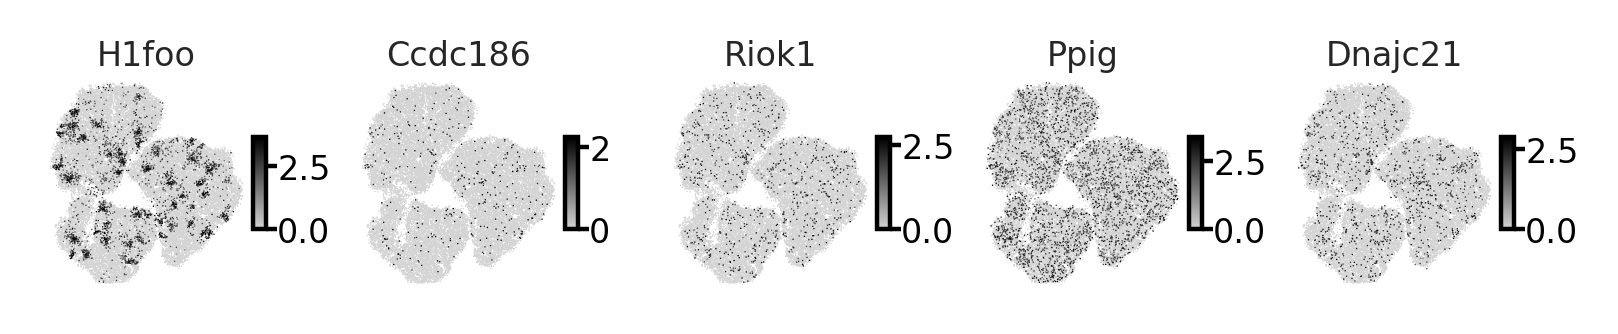

In [578]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(0.7, 0.7), format="pdf")
fig, axs = plt.subplots(1,5, figsize = (5.0,1.0))
gene_list = list(cluster2_markers[1:5]["names"].values)
gene_list.insert(0, "H1foo")
for i, gene in enumerate(gene_list):
    sc.pl.spatial(adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "Immature"], color=gene, spot_size=30, frameon=False, wspace=0.1,cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), vmax="p99.2", ax=axs[i], show=False)
    axs[i].set_title(axs[i].get_title(), pad=-10)
for i in range(1,6):
    mappable = fig.axes[-i].collections[1]
    colorBar = fig.axes[-i]
    colorBar.remove()
    plt.colorbar(mappable=mappable, ax=axs[-i], 
                 fraction=0.25, aspect=7,
                 pad=0 ,shrink = 0.3)
for i in range(1,6):
    fig.axes[-i].tick_params(length = 2, pad = 0.0)
plt.subplots_adjust(wspace=0.0, hspace=0)
plt.show()

/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


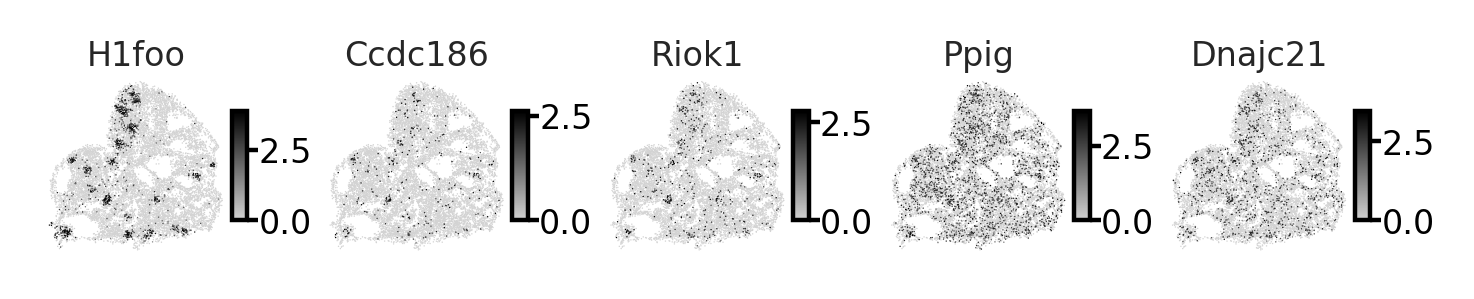

In [584]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(3.0, 3.0), format="pdf")
fig, axs = plt.subplots(1,5, figsize = (4.5,1.2))
gene_list = list(cluster2_markers[1:5]["names"].values)
gene_list.insert(0, "H1foo")
for i, gene in enumerate(gene_list):
    sc.pl.spatial(adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "11hr"], color=gene, spot_size=30, frameon=False, wspace=0.1, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), vmax="p99.2", ax=axs[i], show=False)
    axs[i].set_title(axs[i].get_title(), pad=-10)
for i in range(1,6):
    mappable = fig.axes[-i].collections[1]
    colorBar = fig.axes[-i]
    colorBar.remove()
    plt.colorbar(mappable=mappable, ax=axs[-i], 
                 fraction=0.25, aspect=7,
                 pad=0 ,shrink = 0.3)
for i in range(1,6):
    fig.axes[-i].tick_params(length = 2, pad = 0.0)
plt.subplots_adjust(wspace=0.0, hspace=0)
plt.show()

In [508]:
oocytes_bulk

AnnData object with n_obs × n_vars = 83 × 1421
    obs: 'FollicleNumber', 'Follicle_type', 'Sample', 'size', 'total_counts', 'ngenes_counts', 'S_score', 'G2M_score', 'phase', 'oocyte_leiden_0.5', 'oocyte_leiden_0.7', 'oocyte_leiden_0.8'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Follicle_type_colors', 'log1p', 'hvg', 'pca', 'Sample_colors', 'phase_colors', 'neighbors', 'umap', 'leiden', 'oocyte_leiden_0.7_colors', 'oocyte_leiden_0.8_colors', 'rank_genes_groups_oocytes_Follicle_type', 'rank_genes_groups_oocytes_leiden_0.8', 'dendrogram_oocyte_leiden_0.8', 'dendrogram_Follicle_type'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


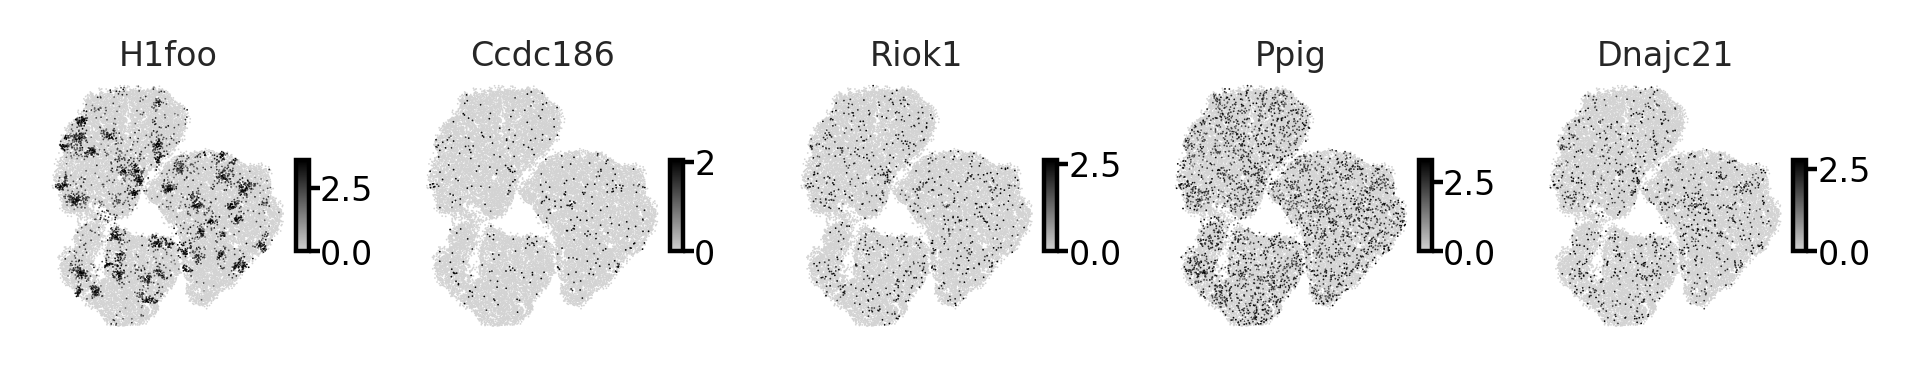

In [590]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(0.8, 0.8), format="pdf")
fig, axs = plt.subplots(1,5, figsize = (6.0,1.0))
gene_list = list(cluster2_markers[1:5]["names"].values)
gene_list.insert(0, "H1foo")
for i, gene in enumerate(gene_list):
    sc.pl.spatial(adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "Immature"], color=gene, spot_size=30, frameon=False, wspace=0.1, ncols=5, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), vmax="p99", ax=axs[i], show=False)
    axs[i].set_title(axs[i].get_title(), pad=-10)
for i in range(1,6):
    mappable = fig.axes[-i].collections[1]
    colorBar = fig.axes[-i]
    colorBar.remove()
    plt.colorbar(mappable=mappable, ax=axs[-i], 
                 fraction=0.25, aspect=7,
                 pad=0 ,shrink = 0.3)
for i in range(1,6):
    fig.axes[-i].tick_params(length = 2, pad = 0.0)
plt.subplots_adjust(wspace=0.0, hspace=0)
plt.savefig("./figures/immature_antral_oocyte_markers.pdf")

/home/mm2937/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


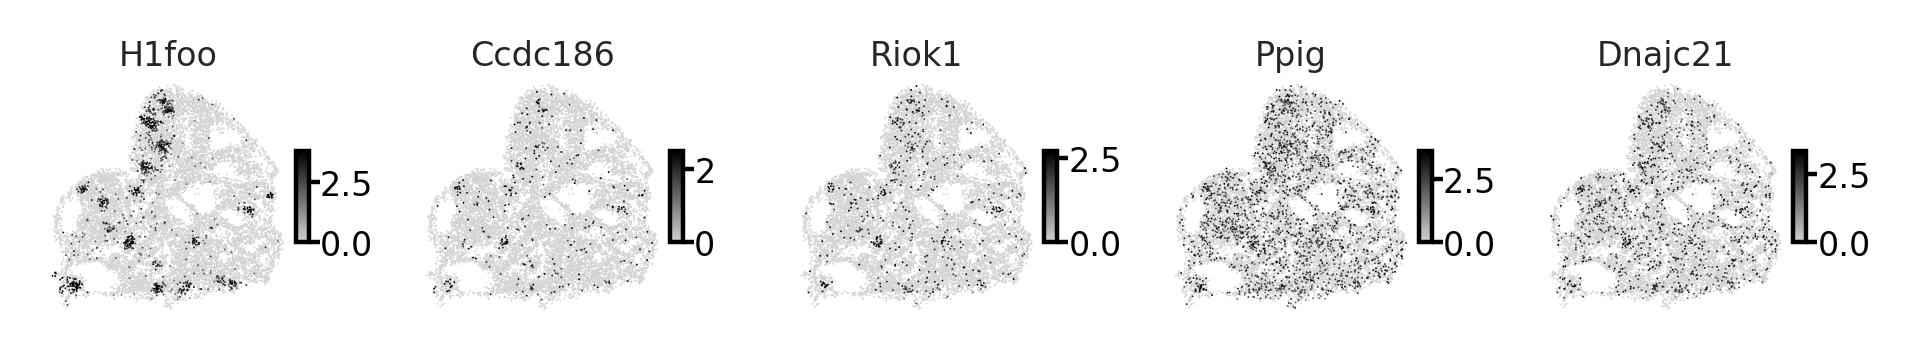

In [591]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(0.8, 0.8), format="pdf")
fig, axs = plt.subplots(1,5, figsize = (6.0,1.0))
gene_list = list(cluster2_markers[1:5]["names"].values)
gene_list.insert(0, "H1foo")
for i, gene in enumerate(gene_list):
    sc.pl.spatial(adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "11hr"], color=gene, spot_size=30, frameon=False, wspace=0.1, ncols=5, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), vmax="p99", ax=axs[i], show=False)
    axs[i].set_title(axs[i].get_title(), pad=-10)
for i in range(1,6):
    mappable = fig.axes[-i].collections[1]
    colorBar = fig.axes[-i]
    colorBar.remove()
    plt.colorbar(mappable=mappable, ax=axs[-i], 
                 fraction=0.25, aspect=7,
                 pad=0 ,shrink = 0.3)
for i in range(1,6):
    fig.axes[-i].tick_params(length = 2, pad = 0.0)
plt.subplots_adjust(wspace=0.0, hspace=0)
plt.savefig("./figures/11hr_antral_oocyte_markers.pdf")

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


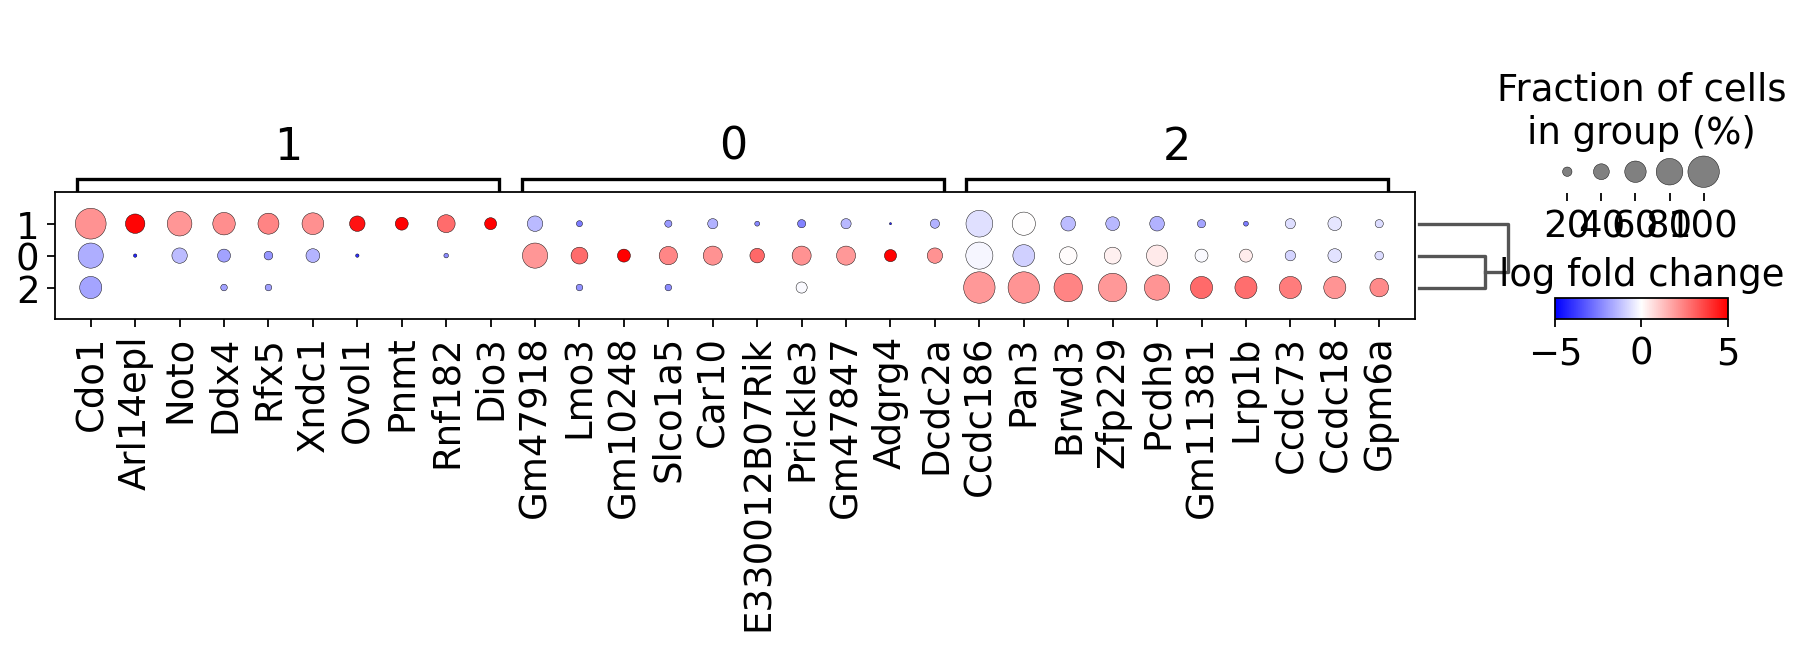

In [502]:
sc.settings.set_figure_params(dpi=80, fontsize=20, facecolor='white', frameon=True, figsize=(10, 5))
sc.pl.rank_genes_groups_dotplot(oocytes_bulk, n_genes=10, key="rank_genes_groups_oocytes_leiden_0.8", values_to_plot='logfoldchanges', min_logfoldchange=2.0, vmax=5, vmin=-5, cmap='bwr')
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))
# save = "oocytes_bulk_combined_clusters_markers"

In [511]:
oocytes_bulk.write_h5ad("./../pyobjs/oocytes_bulk_combined_coor_genes.h5ad")

In [1136]:
oocytes_bulk = sc.read_h5ad("./../pyobjs/oocytes_bulk_combined_coor_genes.h5ad")

In [691]:
follicle_map = sc.read_h5ad("./../pyobjs/adata_ovary_combined_napari_processed.h5ad").obs["FollicleNumber"]

In [ ]:
oocytes_bulk[(oocytes_bulk.obs["Sample"] == "Immature") & (oocytes_bulk.obs["oocyte_leiden_1.0"] == "2") & (oocytes_bulk.obs["Follicle_type"] == "Preantral")].obs["FollicleNumber"]

/tmp/ipykernel_4168612/3214678302.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].astype("category")


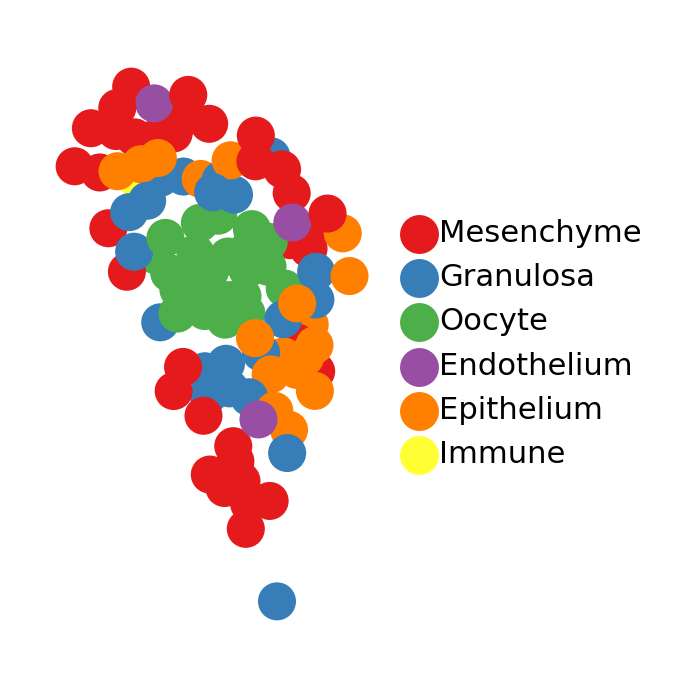

In [917]:
from pylab import *
cmap = cm.get_cmap('Set1', 10)
palette_custom = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
adata_ovary_combined.obs["BroadCelltype"] = [x.split("_")[1] for x in adata_ovary_combined.obs["Level0_max_pred_celltype"].values]
adata_ovary_combined.obs["BroadCelltype"] = adata_ovary_combined.obs["BroadCelltype"].astype("category")
adata_ovary_combined.obs["BroadCelltype"] = adata_ovary_combined.obs["BroadCelltype"].cat.reorder_categories(["Mesenchyme", "Granulosa", "Oocyte", "Endothelium", "Epithelium", "Immune"])
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "Immature"]
temp = temp[follicle_map[follicle_map == "Follicle2"].index.values]
temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].astype("category")
temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].cat.set_categories(adata_ovary_combined.obs["BroadCelltype"].cat.categories)
sc.pl.spatial(temp, color=["BroadCelltype"], palette=palette_custom, spot_size=30, frameon=False, wspace=0.3, na_color="lightgray", na_in_legend=False, title="", save="folliclepreantral_level0pred")

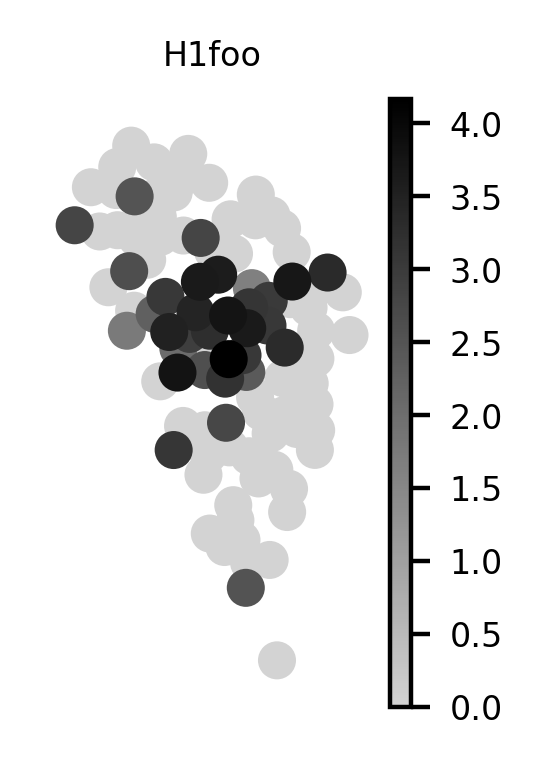

In [806]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "Immature"]
sc.pl.spatial(temp[follicle_map[follicle_map == "Follicle2"].index.values], groups=["Oocyte"], color=["H1foo"], spot_size=30, frameon=False, wspace=0.0, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), vmax='p99.9', save="preantral_h1foo")

In [1018]:
sig_markers = celltype_markers[(abs(celltype_markers["logfoldchanges"]) > 0.0) & (celltype_markers["pvals_adj"]< 0.05)]
# sig_markers = sig_markers.sort_values(by = "logfoldchanges", ascending=False)
sig_markers

names    scores  logfoldchanges         pvals  pvals_adj
0           Gm36307  5.373326        1.943743  3.780161e-06   0.003664
1           Bcl2l10  5.304710        0.660538  3.198050e-06   0.003487
2             Ube2s  4.618007        1.415856  4.152167e-05   0.015748
3     E330021D16Rik  4.404525        0.576784  6.395408e-05   0.022315
4             Myom2  4.337345        1.969462  1.214188e-04   0.034222
5              Plat  4.256485        0.592242  1.030924e-04   0.031744
6            Fbxo34  4.075041        0.872928  1.910229e-04   0.041195
7            Gm2042  4.074541        0.864500  1.983503e-04   0.041195
8             Oosp3  4.002733        1.125471  2.320063e-04   0.043916
8682         Klhl12 -3.972894       -2.120849  2.496959e-04   0.045377
8684        Arfgef3 -4.052420       -2.287573  1.972044e-04   0.041195
8685           Ldhb -4.059206       -0.475795  2.279680e-04   0.043916
8686           Mael -4.079433       -1.754543  2.366218e-04   0.043916
8687           Noto -4.094840       -2.027734  1.772131e-04   0.040850
8688          Sox15 -4.153215       -2.983303  1.448809e-04   0.036058
8689         Osbpl2 -4.154336       -3.025509  1.488102e-04   0.036058
8690           Cdk5 -4.159791       -1.640646  1.820013e-04   0.040850
8691        Angptl2 -4.174051       -2.548867  1.349933e-04   0.035683
8692          Figla -4.191049       -1.806932  1.300509e-04   0.035451
8693           Rcc2 -4.199762       -1.439031  2.282862e-04   0.043916
8694         Timm44 -4.210877       -1.880829  1.216174e-04   0.034222
8695         Mre11a -4.254719       -2.436993  1.018656e-04   0.031744
8696         Dppa5a -4.265511       -1.263710  2.150987e-04   0.043635
8698        Gm14718 -4.308910      -28.041447  1.826370e-04   0.040850
8699       Slc25a26 -4.351446       -1.899243  1.055328e-04   0.031744
8700          Zmym3 -4.379297       -2.106097  6.835884e-05   0.022934
8701           Naaa -4.388384      -28.063023  1.472009e-04   0.036058
8702        Cbfa2t2 -4.458978       -2.903319  6.270884e-05   0.022315
8703         Lrrc14 -4.574857       -2.291002  3.785429e-05   0.015009
8704            Zp2 -4.656360       -0.999555  3.697707e-05   0.015009
8705         Zbtb18 -4.695937       -2.744410  2.537528e-05   0.011650
8706           Cdo1 -4.839560       -1.623484  1.976122e-05   0.009577
8707         Znhit3 -4.866988       -2.675667  1.425727e-05   0.007773
8708       Arl14epl -4.913221       -3.274065  1.277382e-05   0.007428
8709          Mov10 -4.965746      -28.709879  3.045657e-05   0.013284
8710           Ddx4 -5.013908       -2.766516  8.731204e-06   0.005859
8711          Taf4b -5.105148       -3.320560  7.237816e-06   0.005261
8712         Khdc1b -5.122790       -0.373458  5.825485e-06   0.004620
8713           Sfi1 -5.154894      -28.454645  1.815987e-05   0.009318
8714        Hsd11b2 -5.194663       -2.525186  4.853980e-06   0.004234
8715        Tmem232 -5.367562       -2.250000  3.154684e-06   0.003487
8716          Icosl -5.456915       -3.382746  2.617790e-06   0.003487
8717           Astl -5.524740       -1.089550  1.021201e-05   0.006363
8718          Nlrp5 -5.669992       -1.033836  1.636128e-06   0.002854
8719         Nlrp14 -5.851919       -0.655346  1.278905e-06   0.002789
8720            Wt1 -5.886755       -3.373501  5.156246e-07   0.001499
8721           Ldhc -6.593789       -5.548148  2.527044e-07   0.001102
8722          Gdpd2 -7.895583       -6.160249  8.517460e-09   0.000074

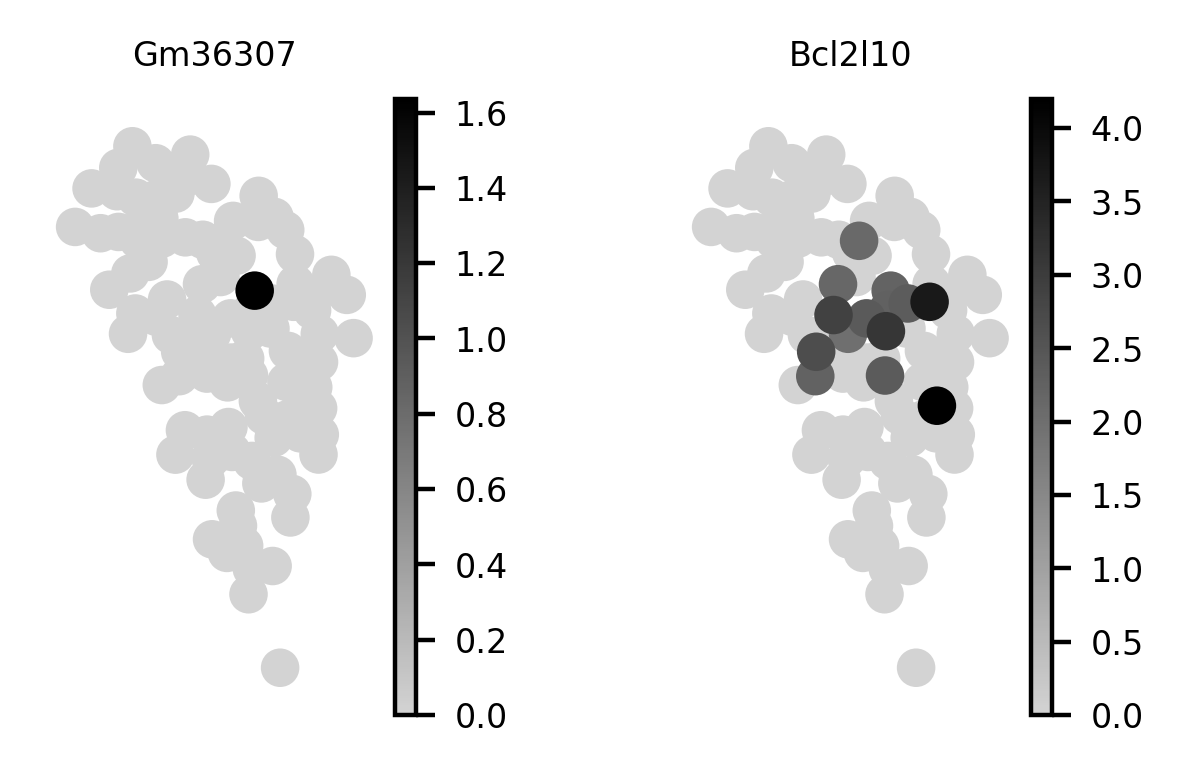

In [1019]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "Immature"]
sc.pl.spatial(temp[follicle_map[follicle_map == "Follicle2"].index.values], color=sig_markers.head(2)["names"], spot_size=30, frameon=False, wspace=0.0, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), save="preantral_oocyte_markers1")

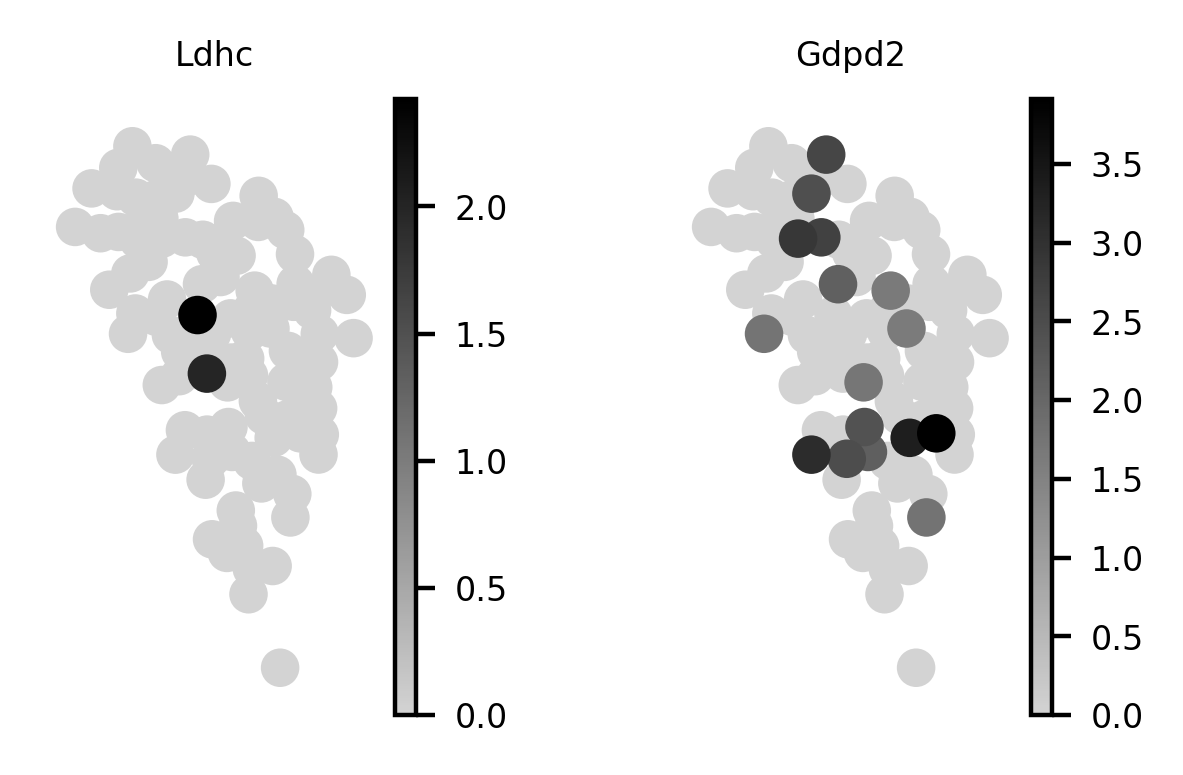

In [1020]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "Immature"]
sc.pl.spatial(temp[follicle_map[follicle_map == "Follicle2"].index.values], color=sig_markers.tail(2)["names"], spot_size=30, frameon=False, wspace=0.0, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), save="preantral_oocyte_markers2")

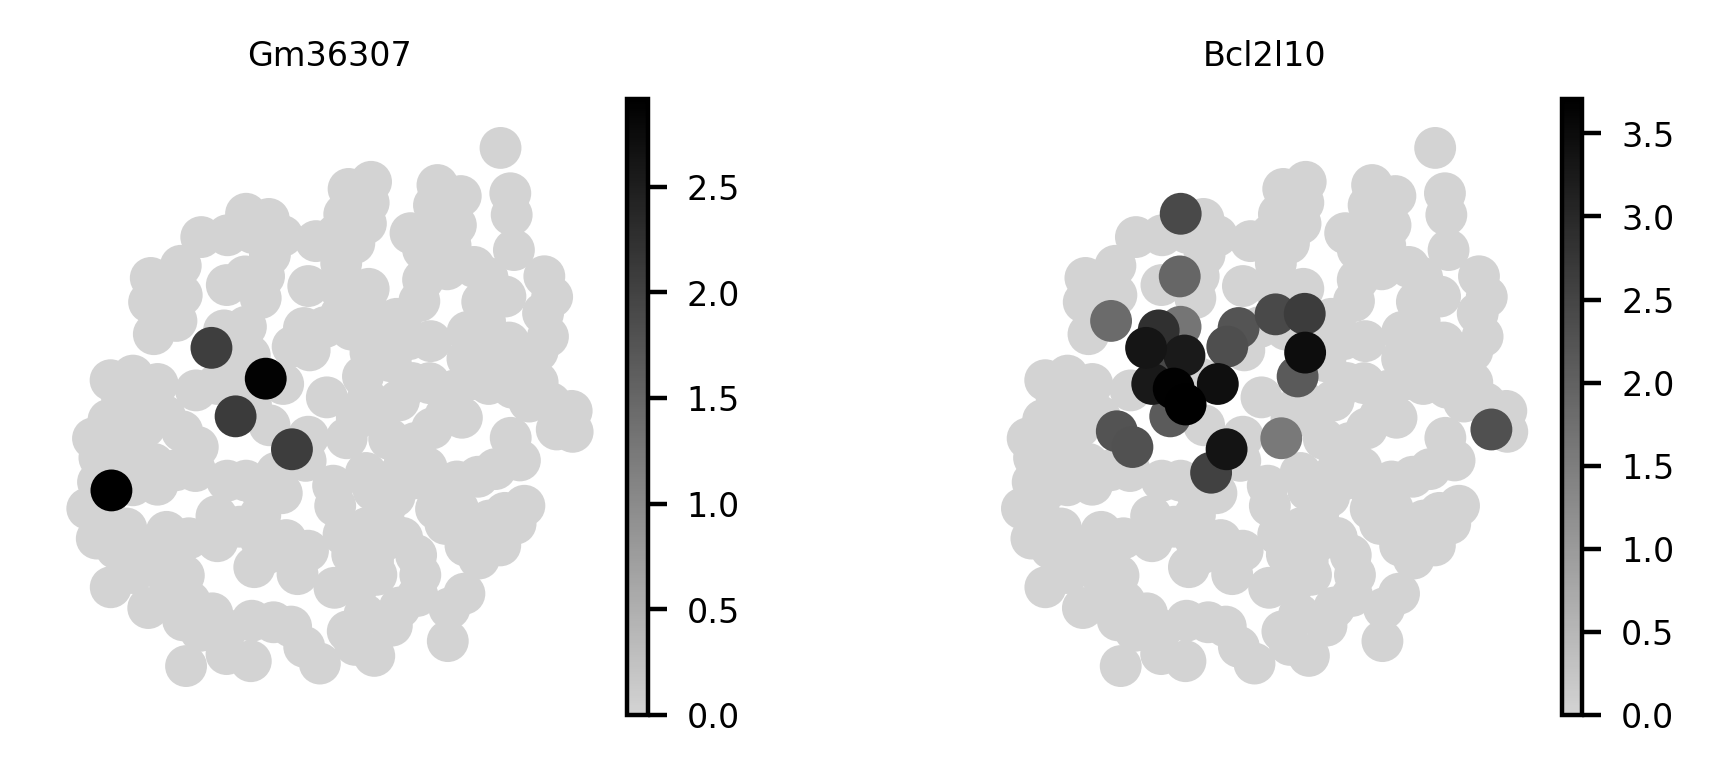

In [1021]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "Immature"]
sc.pl.spatial(temp[follicle_map[follicle_map == "Follicle76"].index.values], color=sig_markers.head(2)["names"], spot_size=30, frameon=False, wspace=0.3, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), save="atretic_oocyte_markers1")

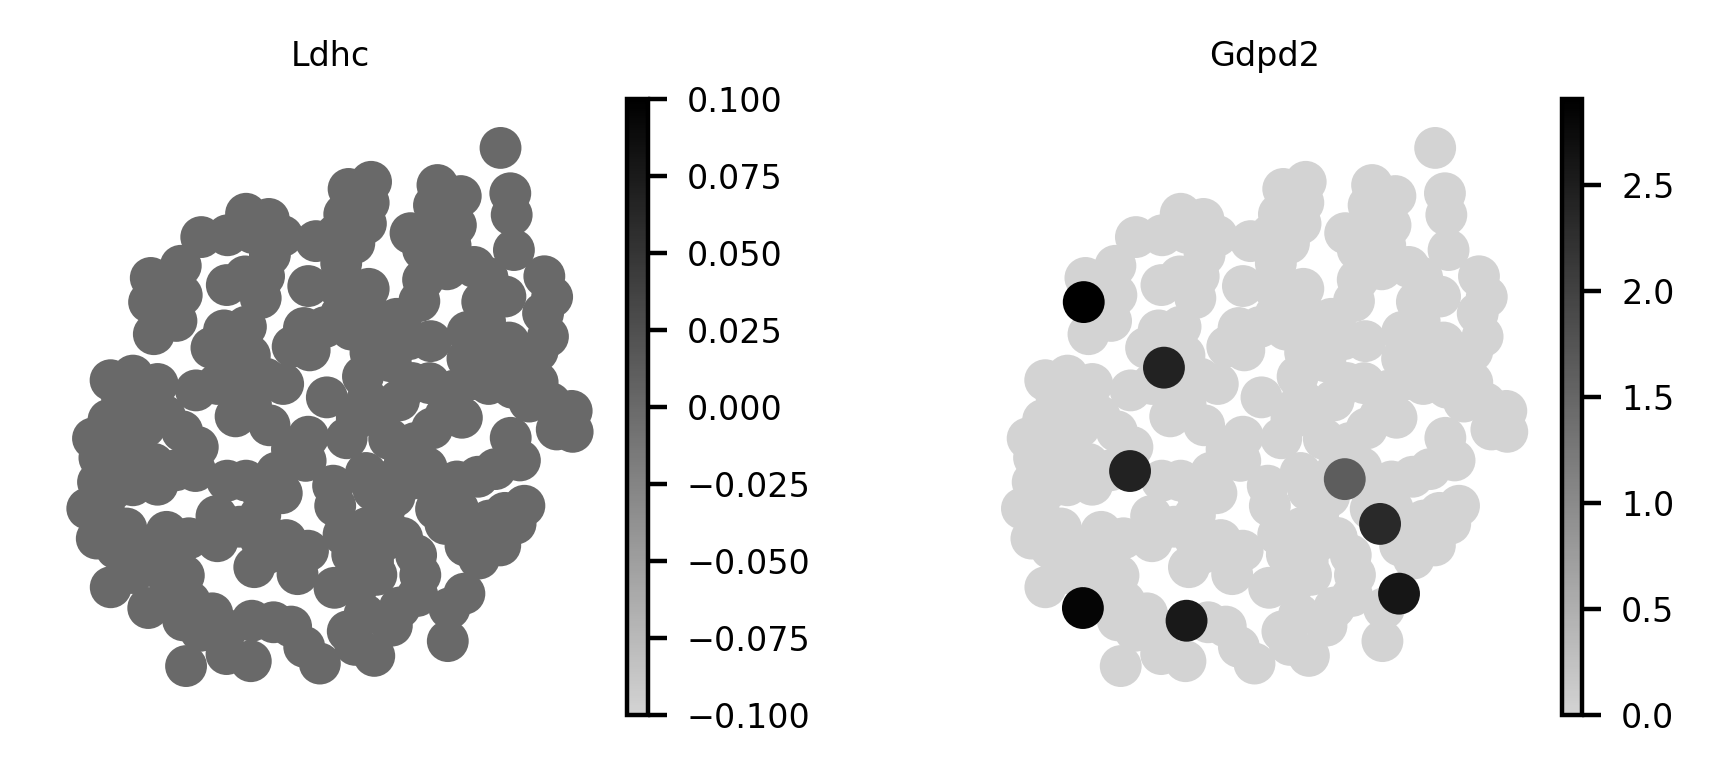

In [1022]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "Immature"]
sc.pl.spatial(temp[follicle_map[follicle_map == "Follicle76"].index.values], color=sig_markers.tail(2)["names"], spot_size=30, frameon=False, wspace=0.3, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), save="atretic_oocyte_markers2")

In [824]:
oocytes_bulk[(oocytes_bulk.obs["Sample"] == "Immature") & (oocytes_bulk.obs["oocyte_leiden_1.0"] == "3") & (oocytes_bulk.obs["Follicle_type"] == "Atretic")].obs["FollicleNumber"]

Follicle7      Follicle7
Follicle25    Follicle25
Follicle45    Follicle45
Follicle57    Follicle57
Follicle59    Follicle59
Follicle76    Follicle76
Follicle85    Follicle85
Follicle86    Follicle86
Follicle92    Follicle92
Follicle97    Follicle97
Name: FollicleNumber, dtype: category
Categories (10, object): ['Follicle7', 'Follicle25', 'Follicle45', 'Follicle57', ..., 'Follicle85', 'Follicle86', 'Follicle92', 'Follicle97']

/tmp/ipykernel_4168612/4261116511.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].astype("category")


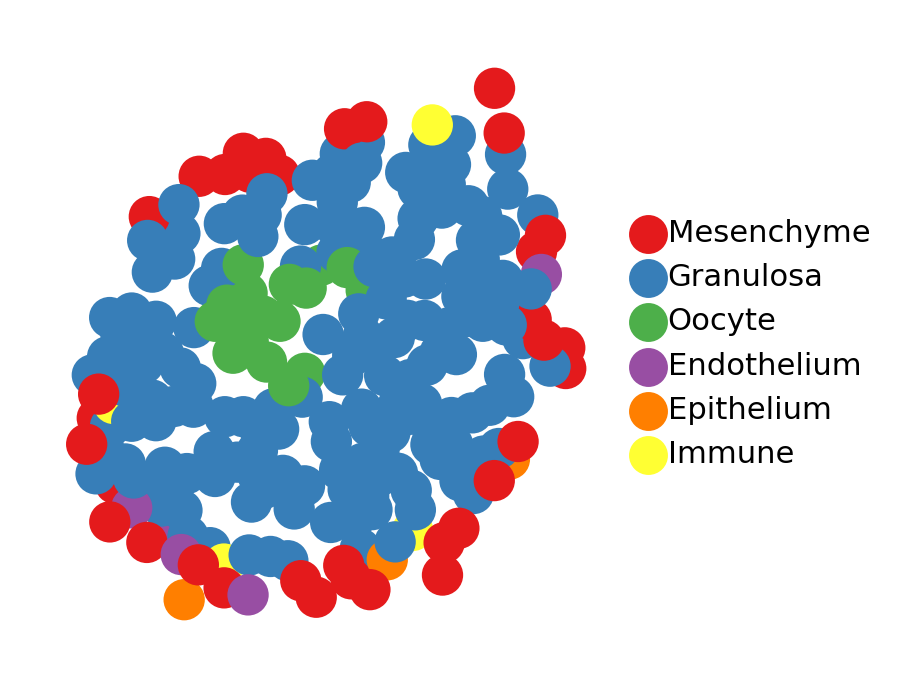

In [916]:
from pylab import *
cmap = cm.get_cmap('Set1', 10)
palette_custom = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
adata_ovary_combined.obs["BroadCelltype"] = [x.split("_")[1] for x in adata_ovary_combined.obs["Level0_max_pred_celltype"].values]
adata_ovary_combined.obs["BroadCelltype"] = adata_ovary_combined.obs["BroadCelltype"].astype("category")
adata_ovary_combined.obs["BroadCelltype"] = adata_ovary_combined.obs["BroadCelltype"].cat.reorder_categories(["Mesenchyme", "Granulosa", "Oocyte", "Endothelium", "Epithelium", "Immune"])
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "Immature"]
temp = temp[follicle_map[follicle_map == "Follicle76"].index.values]
temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].astype("category")
temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].cat.set_categories(adata_ovary_combined.obs["BroadCelltype"].cat.categories)
sc.pl.spatial(temp, color=["BroadCelltype"], palette=palette_custom, spot_size=30, frameon=False, wspace=0.3, na_color="lightgray", na_in_legend=False, title="", save="follicleatretic_level0pred")

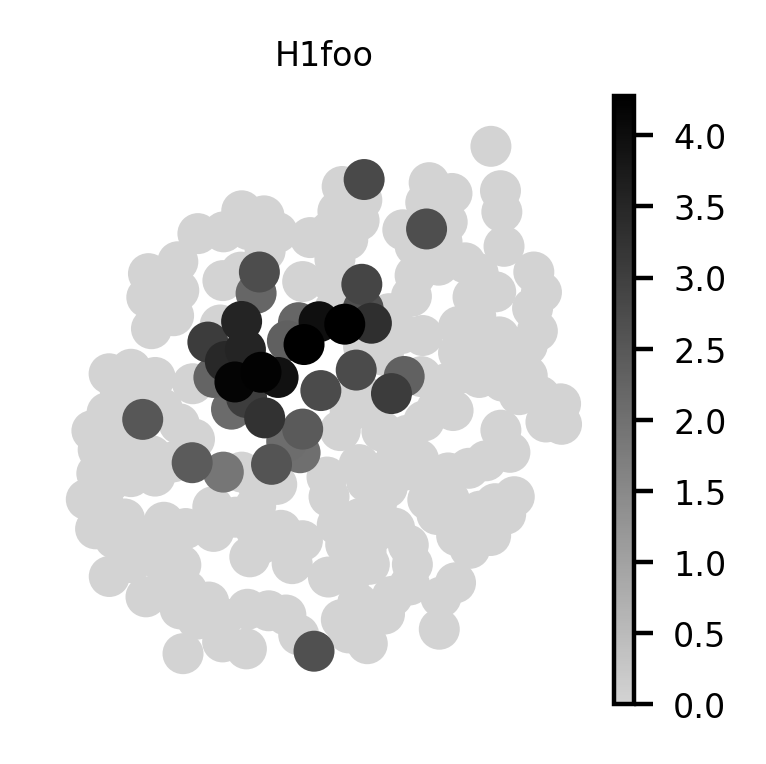

In [604]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "Immature"]
sc.pl.spatial(temp[follicle_map[follicle_map == "Follicle76"].index.values], groups=["Oocyte"], color=["H1foo"], spot_size=30, frameon=False, wspace=0.0, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), vmax='p99.9', save="atretic_h1foo")

In [919]:
oocytes_bulk.uns['log1p']["base"] = None

In [920]:
sc.tl.rank_genes_groups(oocytes_bulk, groupby="oocyte_leiden_1.0", groups= ["2"], use_raw=True, key_added='oocytes_antral_markers')

In [921]:
result = oocytes_bulk.uns['oocytes_antral_markers']
groups = result['names'].dtype.names
celltype_markers = pd.DataFrame(
    {key[:]: result[key][group]
    for group in groups for key in ['names', 'scores', 'logfoldchanges', 'pvals',  'pvals_adj']})
celltype_markers.to_csv("./../pyobjs/Immature_Antral_oocytes.csv")
# celltype_markers = celltype_markers[celltype_markers["pvals_adj"] < 0.05]
print(celltype_markers.shape)
print(celltype_markers.head(10))
print(celltype_markers.tail(10))

(13801, 5)
      names    scores  logfoldchanges         pvals     pvals_adj
0      Top1  9.052745        1.632864  5.884900e-12  2.707250e-08
1     Saraf  7.882339        1.040763  8.438389e-11  1.940970e-07
2  Serpine2  7.664153        0.831010  1.373557e-09  1.531888e-06
3       Ssb  7.645915        1.047019  3.013816e-08  2.599605e-05
4     Ddit4  7.323061        1.101741  3.136716e-10  4.819827e-07
5  Mphosph8  7.235528        1.576979  7.510940e-08  4.711749e-05
6     Hmgb1  6.819033        1.014712  3.631851e-08  2.948422e-05
7      Spp1  6.733949        6.211412  2.313714e-06  6.652411e-04
8      Hpf1  6.600281        0.977719  6.831909e-08  4.711749e-05
9    C86187  6.510496        1.382357  7.556339e-07  2.744343e-04
         names    scores  logfoldchanges         pvals     pvals_adj
13791     Pigp -6.841454       -2.143334  5.834182e-07  2.300501e-04
13792    Enox1 -6.965037       -2.608525  4.160882e-07  1.914144e-04
13793  Slc38a3 -6.973601       -4.297127  6.461489e-10  

In [944]:
sig_markers = celltype_markers[(abs(celltype_markers["logfoldchanges"]) > 1.0) & (celltype_markers["pvals_adj"]< 0.01)]
sig_markers = sig_markers.sort_values(by = "logfoldchanges", ascending=False)
sig_markers.head(10)

names    scores  logfoldchanges         pvals     pvals_adj
7       Spp1  6.733949        6.211412  2.313714e-06  6.652411e-04
11      Ptx3  6.025159        5.500629  9.434796e-06  1.678011e-03
12     Nupr1  5.994720        3.147367  7.017778e-06  1.364118e-03
0       Top1  9.052745        1.632864  5.884900e-12  2.707250e-08
5   Mphosph8  7.235528        1.576979  7.510940e-08  4.711749e-05
25    Mis18a  4.997802        1.563642  2.927988e-05  3.607961e-03
9     C86187  6.510496        1.382357  7.556339e-07  2.744343e-04
18       Pnn  5.393951        1.363007  7.616649e-06  1.420505e-03
29      Tesc  4.865305        1.287467  4.806890e-05  4.852251e-03
10    Tiparp  6.174459        1.170459  5.330551e-07  2.229301e-04

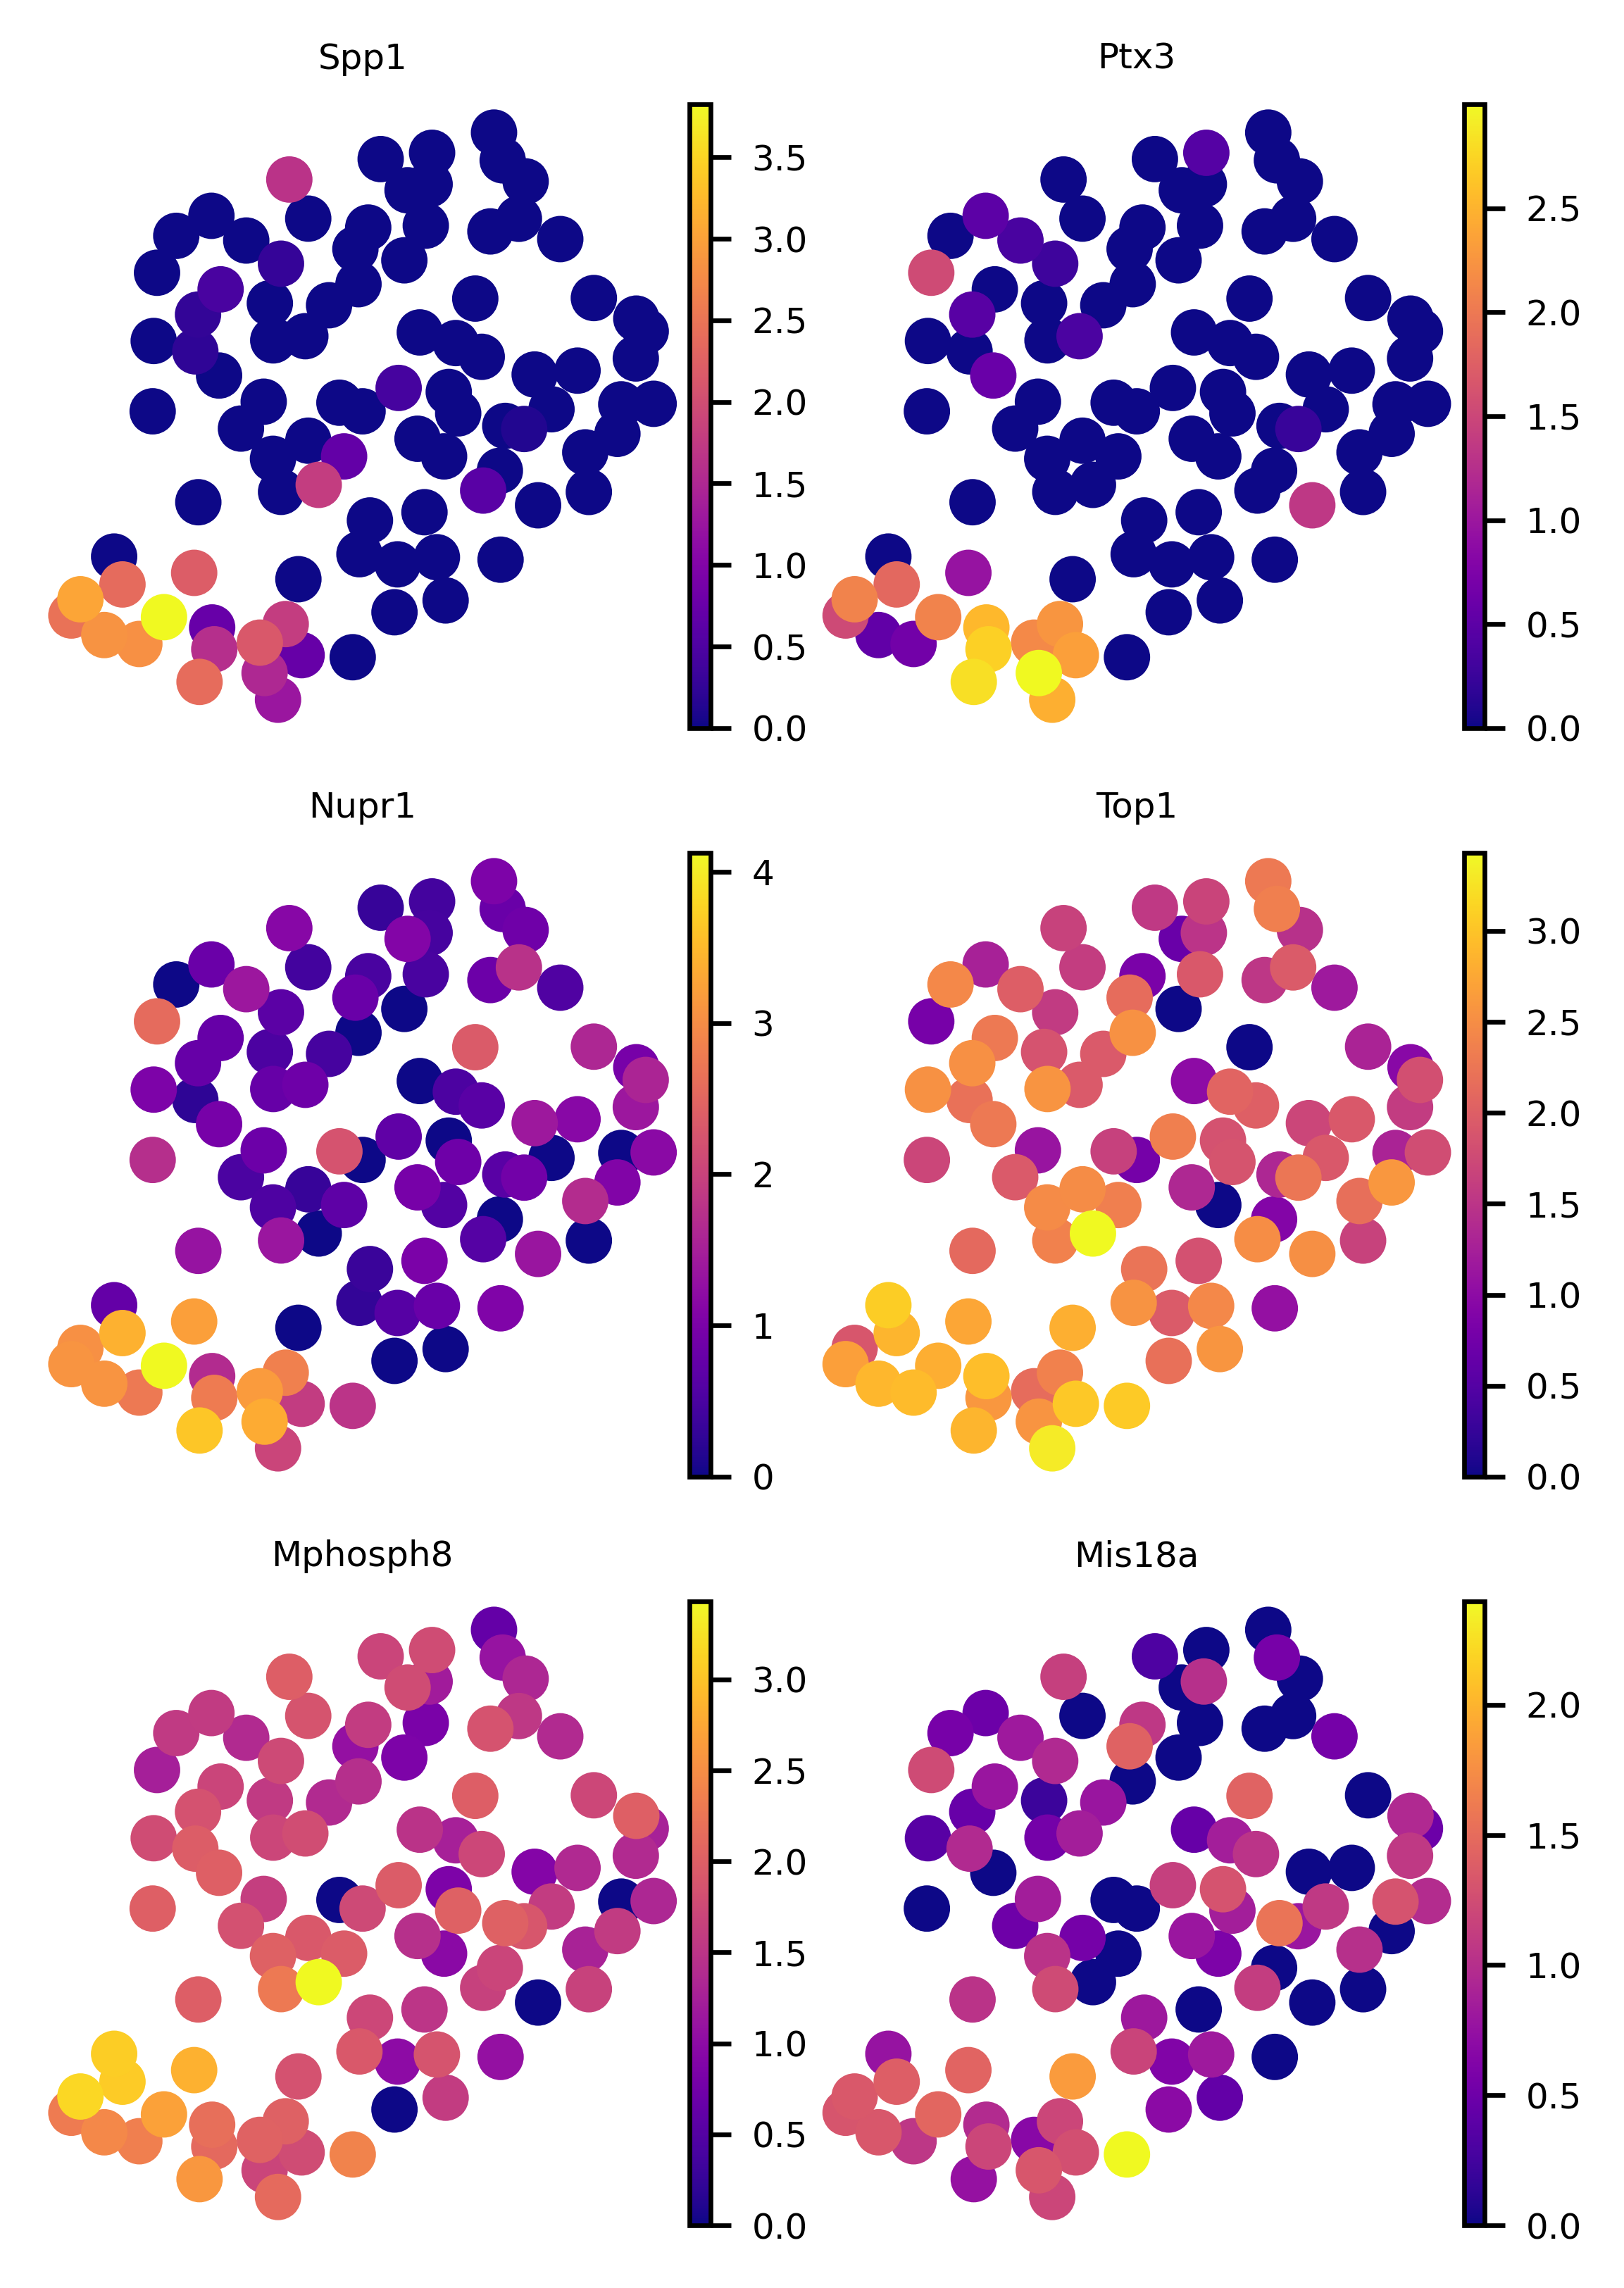

In [951]:
sc.settings.set_figure_params(dpi=300, dpi_save=300, facecolor='white', fontsize=6, frameon=False, figsize=(2, 2))
# sc.pl.umap(oocytes_bulk, size = 250.0, color = ["oocyte_leiden_1.0"], ncols=3, palette="tab10",  title = "", save = "oocytes_clusters.pdf")
sc.pl.umap(oocytes_bulk, color=sig_markers.head(6)["names"], ncols=2, wspace=0.1, hspace = 0.2, size = 250, cmap="plasma", save = "oocyte_bulk_antral_markers")

In [955]:
adata_ovary_combined.obs["Sample"]

CCGATGGAGTCTTA-Immature    Immature
GTGGCGGACGCCAA-Immature    Immature
AAGGATACCTACAT-Immature    Immature
TGTACCCTGGCGCT-Immature    Immature
ACATCAACAGGGCA-Immature    Immature
                             ...   
ACGATATGTTCTTA-12hr            12hr
CCTATGATCGCAAG-12hr            12hr
ACAGCCATGGACTC-12hr            12hr
CAGCATAGCAAACA-12hr            12hr
AGATGCACATCGGG-12hr            12hr
Name: Sample, Length: 158309, dtype: category
Categories (10, object): ['Immature', '0hr', '1hr', '4hr', ..., '8hr', '8hr_replicate', '11hr', '12hr']

/tmp/ipykernel_4168612/1146305631.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].astype("category")


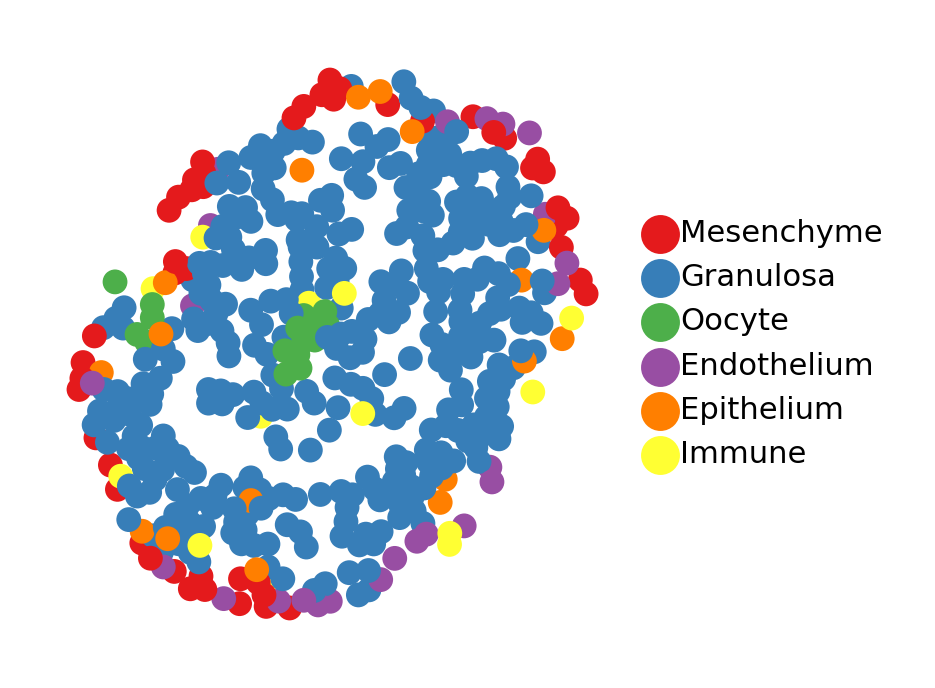

In [961]:
from pylab import *
cmap = cm.get_cmap('Set1', 10)
palette_custom = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
adata_ovary_combined.obs["BroadCelltype"] = [x.split("_")[1] for x in adata_ovary_combined.obs["Level0_max_pred_celltype"].values]
adata_ovary_combined.obs["BroadCelltype"] = adata_ovary_combined.obs["BroadCelltype"].astype("category")
adata_ovary_combined.obs["BroadCelltype"] = adata_ovary_combined.obs["BroadCelltype"].cat.reorder_categories(["Mesenchyme", "Granulosa", "Oocyte", "Endothelium", "Epithelium", "Immune"])
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "8hr"]
temp = temp[follicle_map[follicle_map == "Follicle291"].index.values]
temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].astype("category")
temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].cat.set_categories(adata_ovary_combined.obs["BroadCelltype"].cat.categories)
sc.pl.spatial(temp, color=["BroadCelltype"], palette=palette_custom, spot_size=30, frameon=False, wspace=0.3, na_color="lightgray", na_in_legend=False, title="", save="follicleantral_level0pred")

/tmp/ipykernel_4168612/1996220303.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].astype("category")


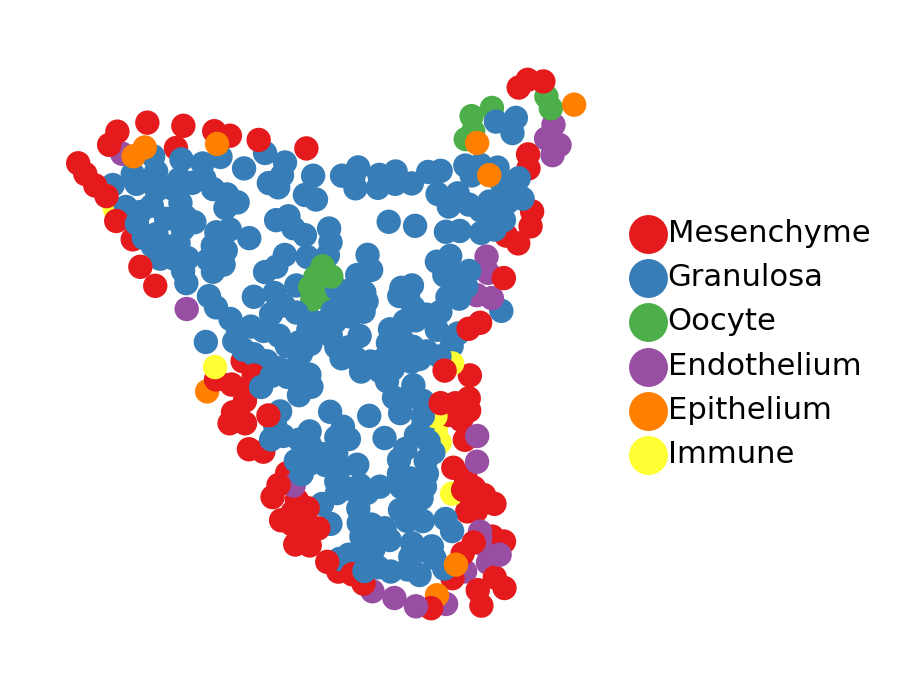

In [965]:
from pylab import *
cmap = cm.get_cmap('Set1', 10)
palette_custom = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
adata_ovary_combined.obs["BroadCelltype"] = [x.split("_")[1] for x in adata_ovary_combined.obs["Level0_max_pred_celltype"].values]
adata_ovary_combined.obs["BroadCelltype"] = adata_ovary_combined.obs["BroadCelltype"].astype("category")
adata_ovary_combined.obs["BroadCelltype"] = adata_ovary_combined.obs["BroadCelltype"].cat.reorder_categories(["Mesenchyme", "Granulosa", "Oocyte", "Endothelium", "Epithelium", "Immune"])
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "8hr"]
temp = temp[follicle_map[follicle_map == "Follicle278"].index.values]
temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].astype("category")
temp.obs["BroadCelltype"] = temp.obs["BroadCelltype"].cat.set_categories(adata_ovary_combined.obs["BroadCelltype"].cat.categories)
sc.pl.spatial(temp, color=["BroadCelltype"], palette=palette_custom, spot_size=30, frameon=False, wspace=0.3, na_color="lightgray", na_in_legend=False, title="", save="follicleantral_level0pred")

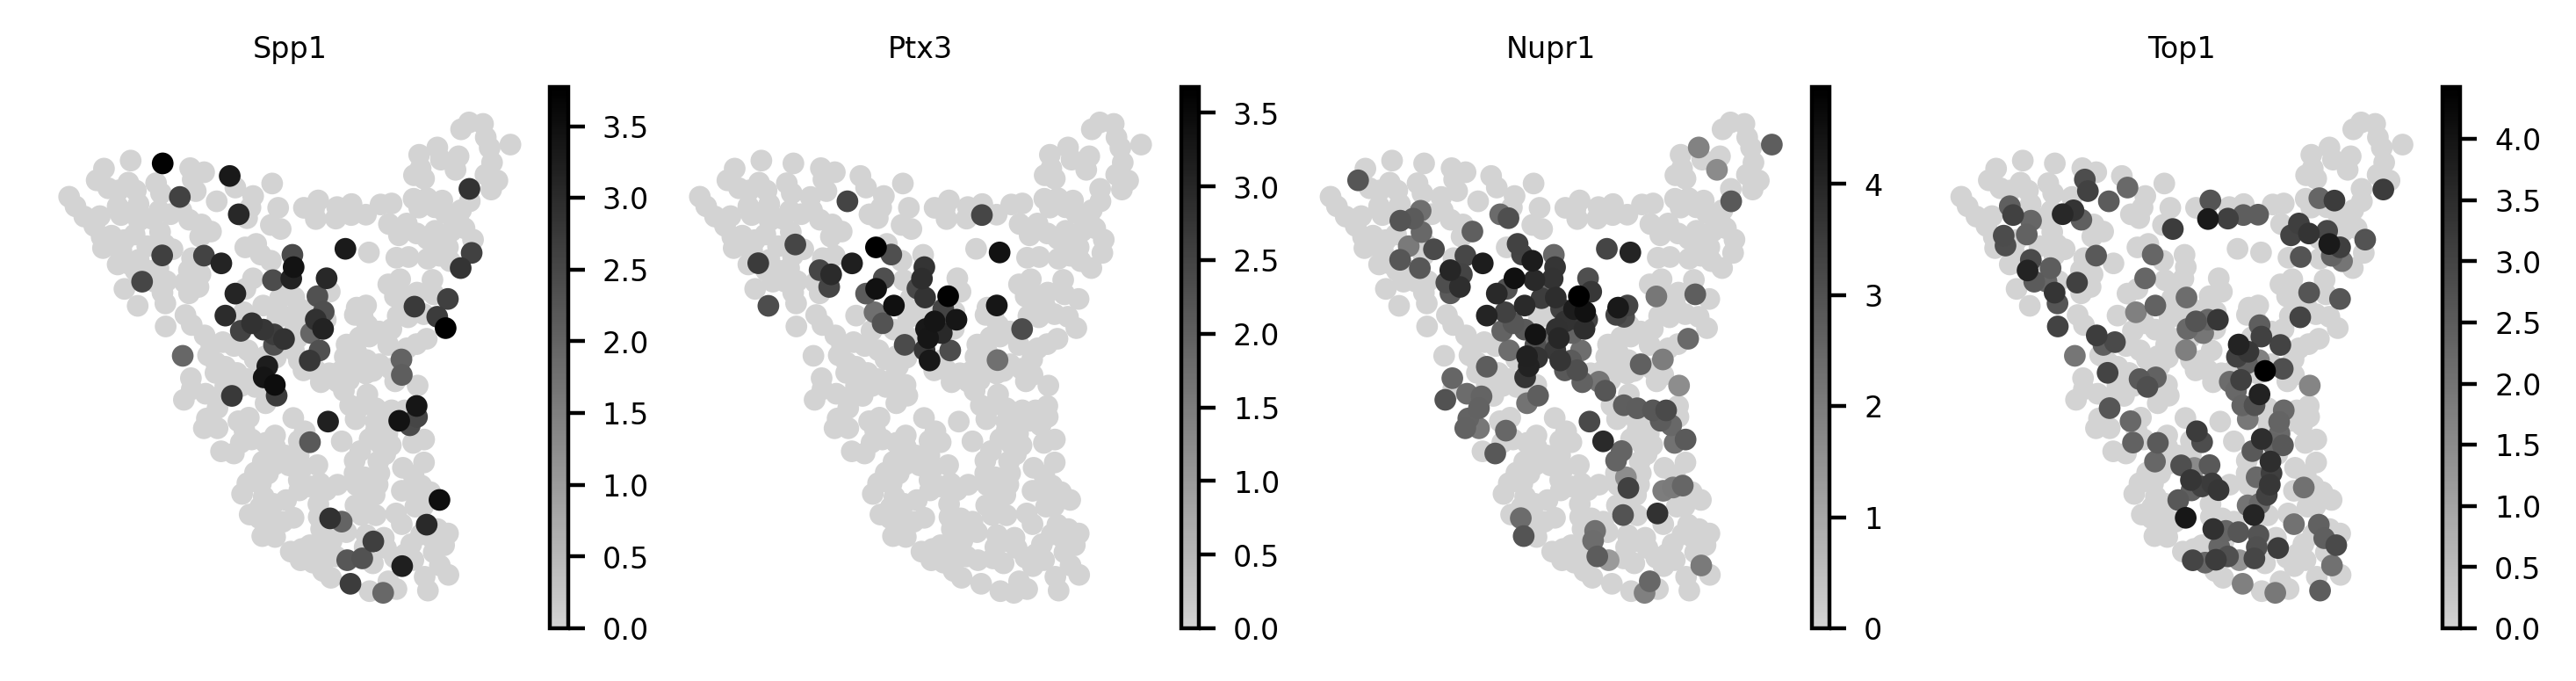

In [966]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "8hr"]
sc.pl.spatial(temp[follicle_map[follicle_map == "Follicle278"].index.values], ncols=6, color=sig_markers.head(4)["names"], spot_size=30, frameon=False, wspace=0.1, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), save="antral_oocyte_markers1")

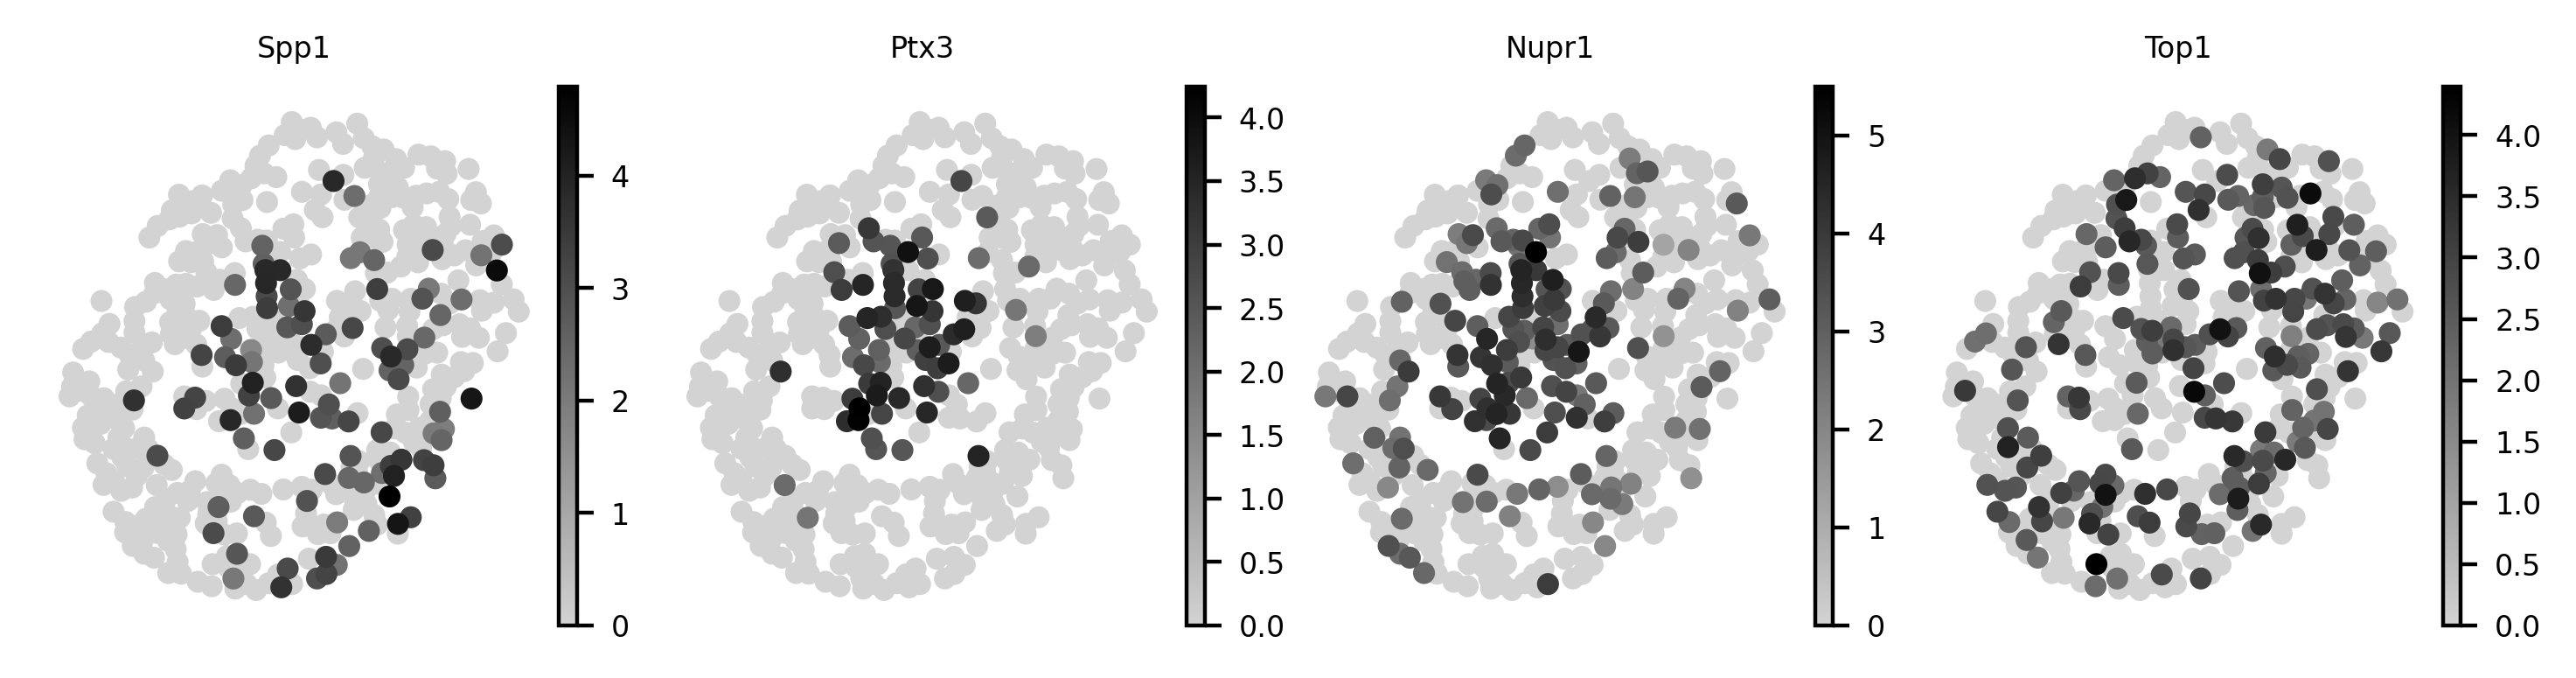

In [967]:
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white', fontsize=6, frameon=True, figsize=(2, 2), format="pdf")
temp = adata_ovary_combined[adata_ovary_combined.obs["Sample"] == "8hr"]
sc.pl.spatial(temp[follicle_map[follicle_map == "Follicle291"].index.values], ncols=6, color=sig_markers.head(4)["names"], spot_size=30, frameon=False, wspace=0.1, cmap=sns.blend_palette(["lightgrey", sns.xkcd_rgb["black"]], as_cmap=True), save="antral_oocyte_markers1")